#  Ciberseguridad en América latina y el Caribe

### Por Daniel Castillo de Regil

# 

##### Existen etapas de las calififcaiones de cyberseguridad que son:

1)	Inicial: No existe madurez en ciberseguridad, sin estrategias.

2)	Formativa: Algunos aspectos comienzan a crecer y formularse, pero no muy bien definidas.

3)	Consolidada: Los indicadores están instalados y son funcionales, pero los recursos para su funcionamiento no son los mejores.

4)	Estratégica: Clasifican los indicadores sabiendo cuales son mejores y asignando recursos a ellos, pero esto se decide por las circunstancias del país.

5)	Dinámica: Existen mecanismos claros y las estrategias son concordes con las amenazas y cambian de manera calmada y correcta.


### 

Importar librerias

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc
from kneed import KneeLocator

Leemos archivo de Promedios de Cyberseguridad

In [4]:
dat2 = pd.read_csv("CYBER.csv")
dat2 = dat2.drop('Year', axis=1)
dat2.head(5)

,Name,Strategy Development,OrganizationEN,Content,Identification of Incidents,OrganizationRI,CoordinationRI,Mode of Operation,Identification of Incidents.1,OrganizationPI,...,ICT Security Standards,Standards in Procurement,Standards in Software Development,Internet Infrastructure Resilience,Software Quality,Technical Security Controls,Cryptographic Controls,Cyber Security Technologies,Cybercrime Insurance,Responsible Disclosure
0,Antigua and Barbuda,1,2,1,1,2,1,1,2,2,...,1,1,1,2,1,2,2,1,1,1
1,Argentina,2,3,2,4,3,3,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,Barbados,1,1,1,1,2,1,1,1,1,...,2,1,1,3,1,2,2,1,1,1
3,Bolivia,1,2,2,3,3,2,2,2,1,...,2,2,2,2,2,2,2,2,1,2
4,Brazil,2,2,2,4,4,4,3,3,3,...,4,2,2,3,2,3,3,3,3,3


Exploración de datos

In [6]:
dat2.describe()

,Strategy Development,OrganizationEN,Content,Identification of Incidents,OrganizationRI,CoordinationRI,Mode of Operation,Identification of Incidents.1,OrganizationPI,Risk Management and Response,...,ICT Security Standards,Standards in Procurement,Standards in Software Development,Internet Infrastructure Resilience,Software Quality,Technical Security Controls,Cryptographic Controls,Cyber Security Technologies,Cybercrime Insurance,Responsible Disclosure
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.117647,1.882353,1.852941,2.147059,2.235294,2.088235,1.823529,1.617647,1.588235,1.529412,...,1.941176,1.617647,1.764706,2.264706,1.705882,1.852941,2.058824,1.676471,1.441176,1.382353
std,1.225109,1.066422,1.131702,1.184044,1.207522,1.190051,1.113841,0.888127,0.988346,0.991946,...,1.013281,0.953930,0.955330,0.898107,0.905519,1.018982,0.919195,0.911894,0.927400,0.953930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.500000,1.500000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
print("Contamos con "+str(dat2['Name'].count())+' paises en la base de datos.')

Contamos con 34 paises en la base de datos.


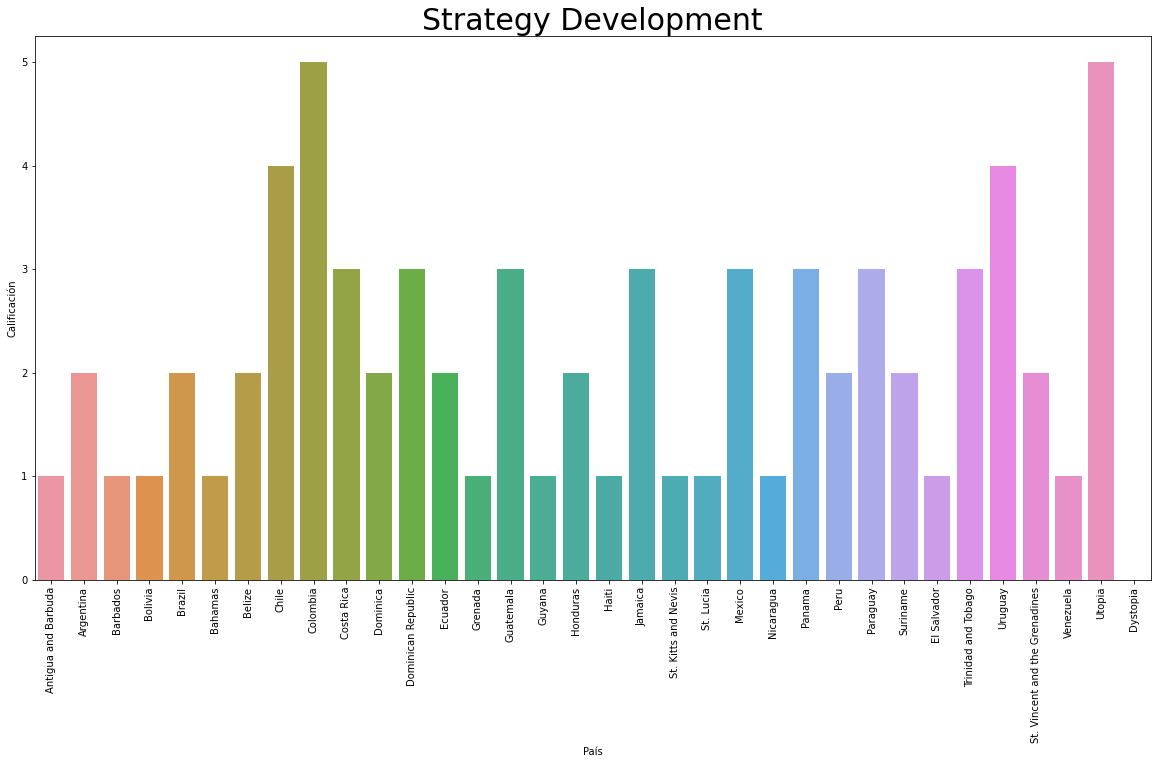

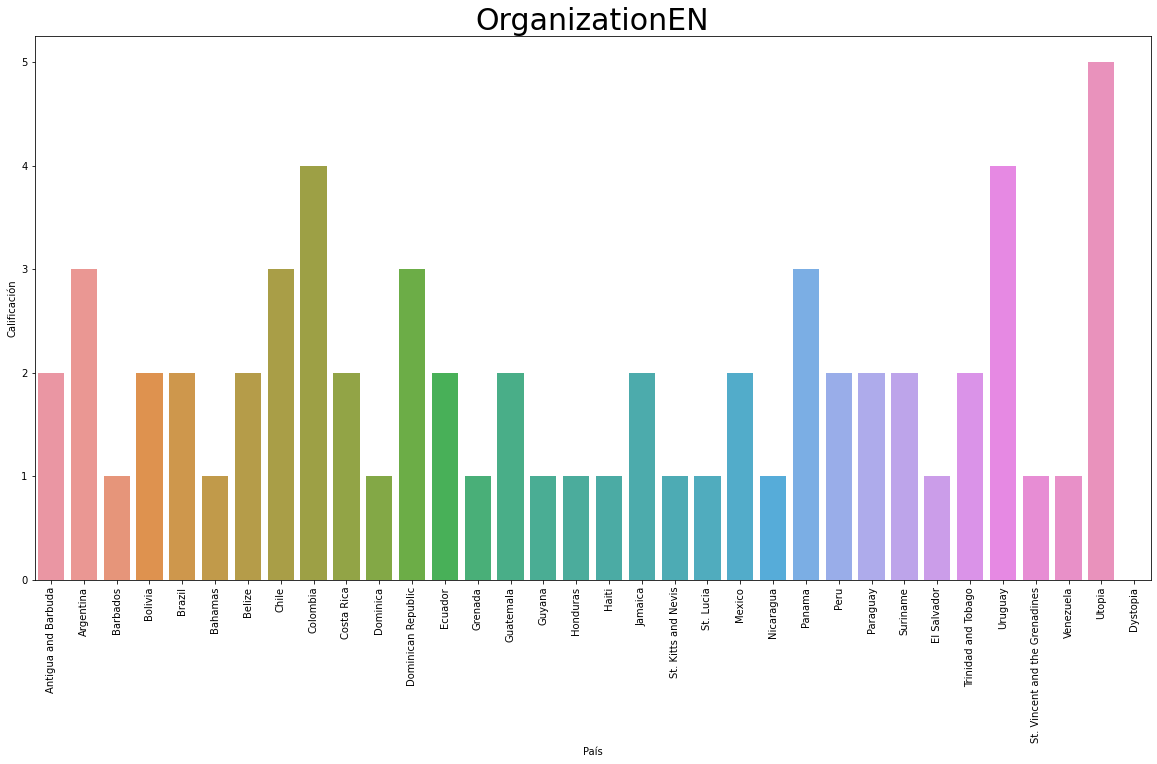

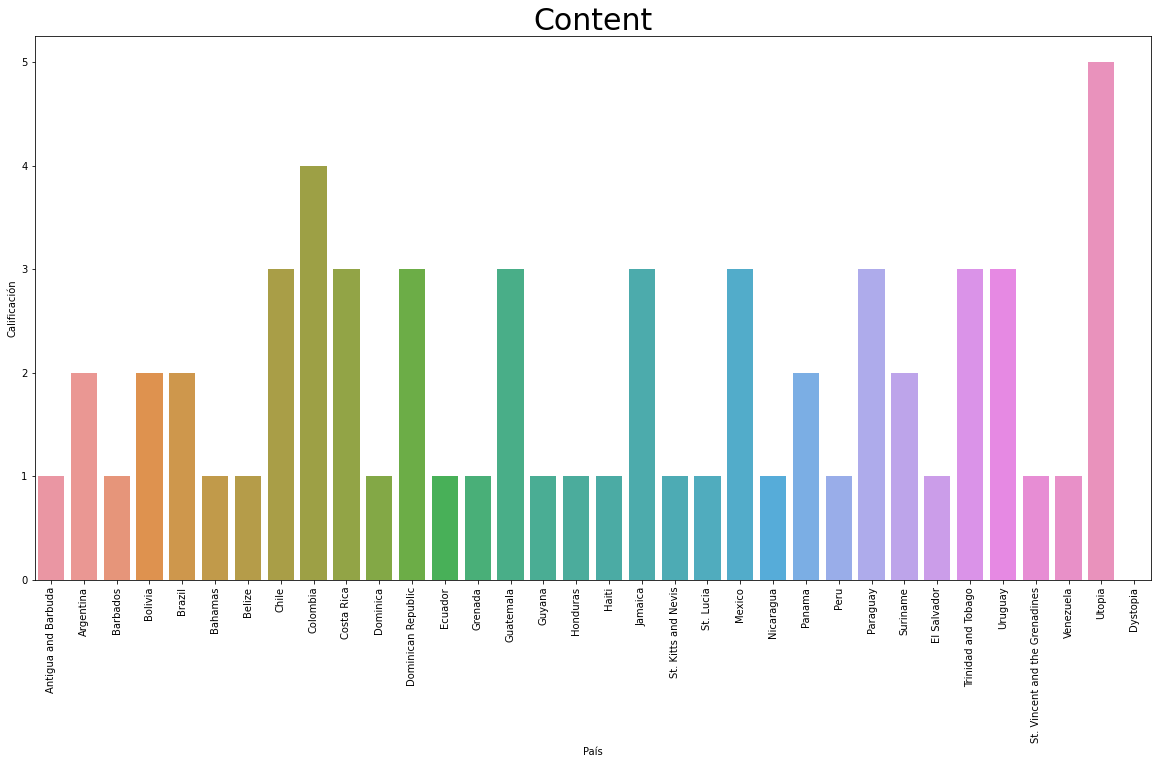

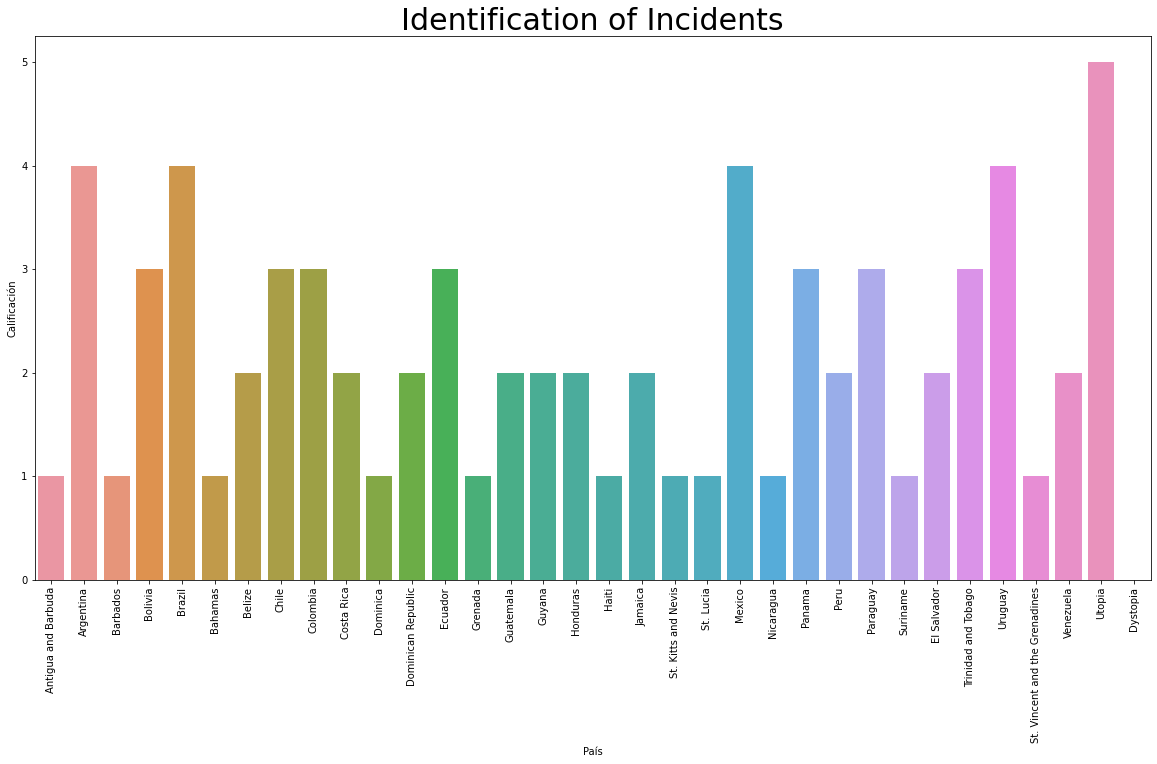

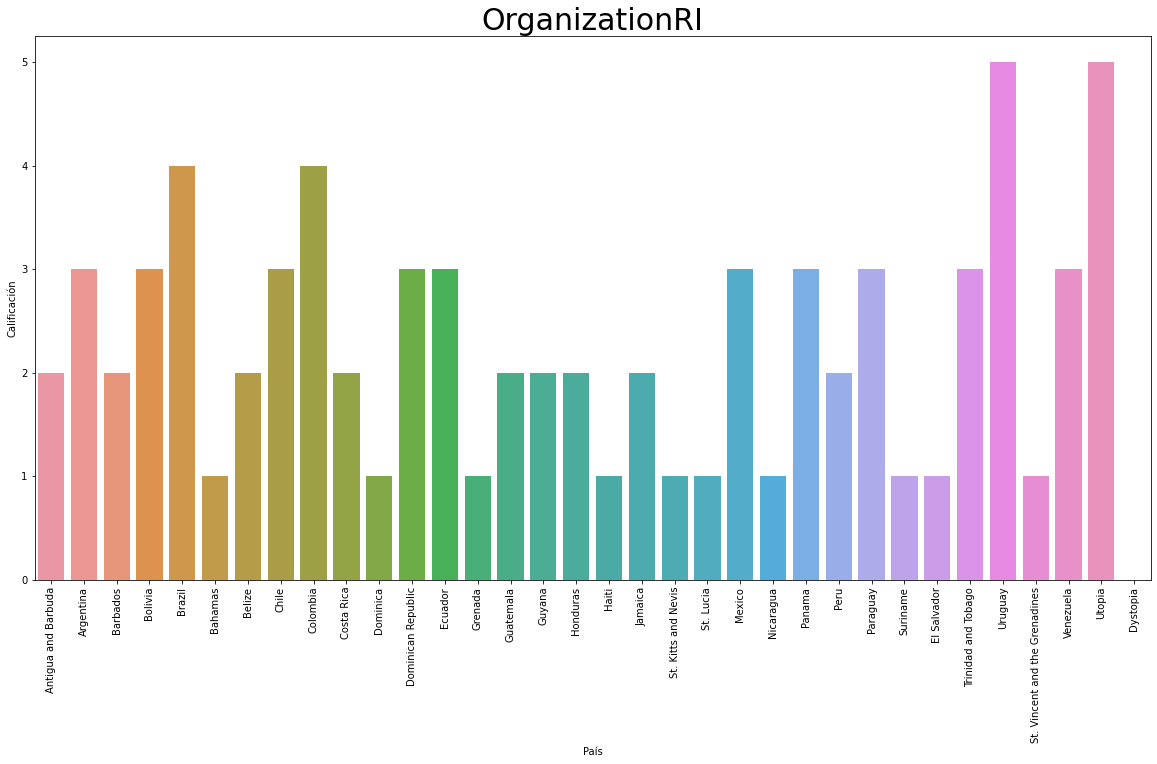

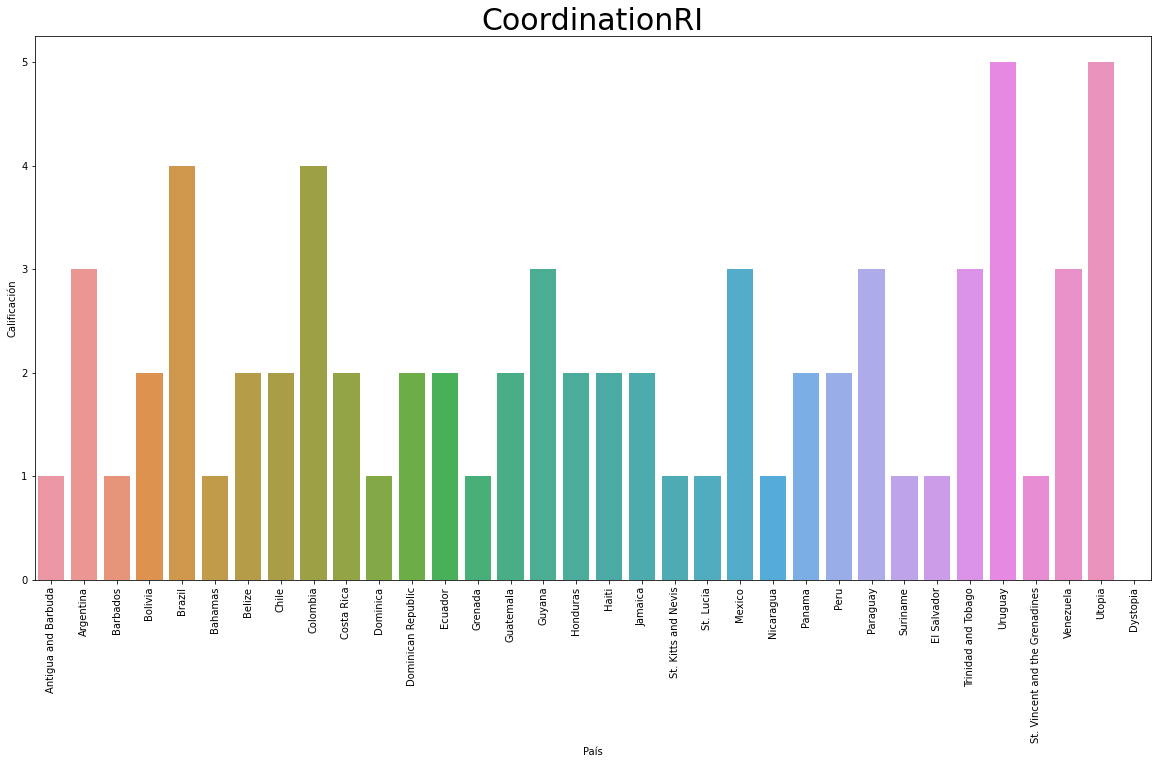

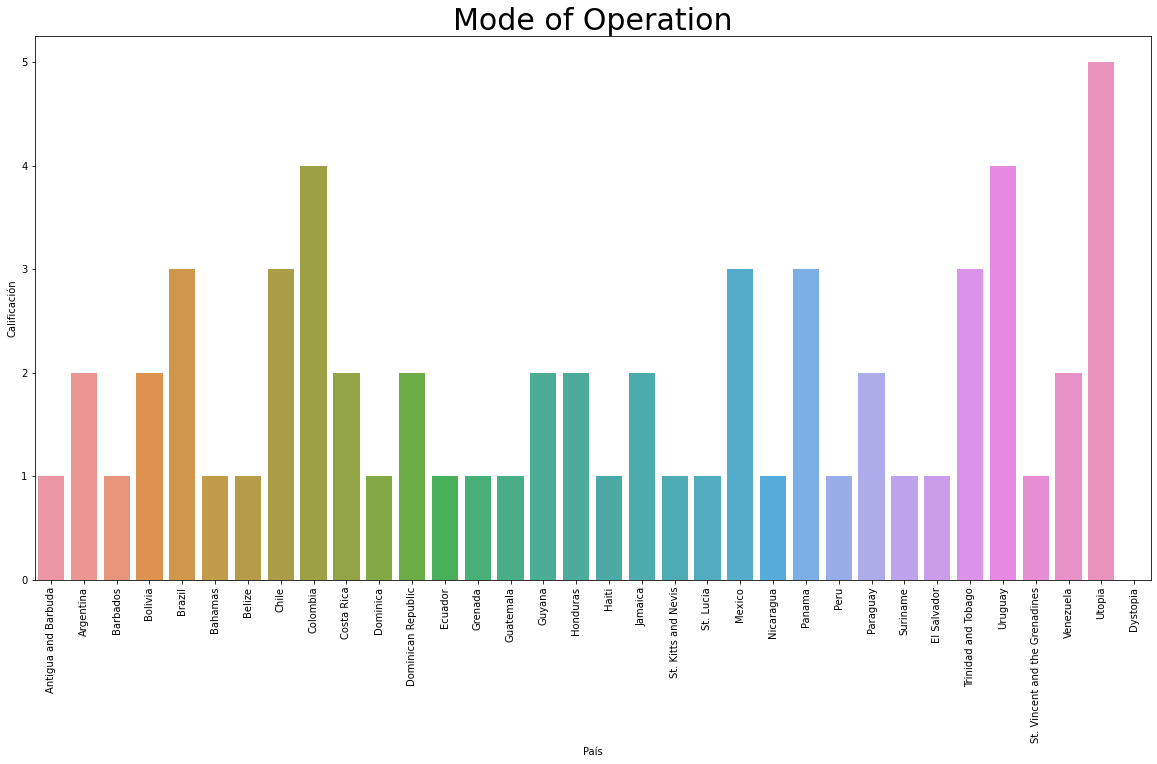

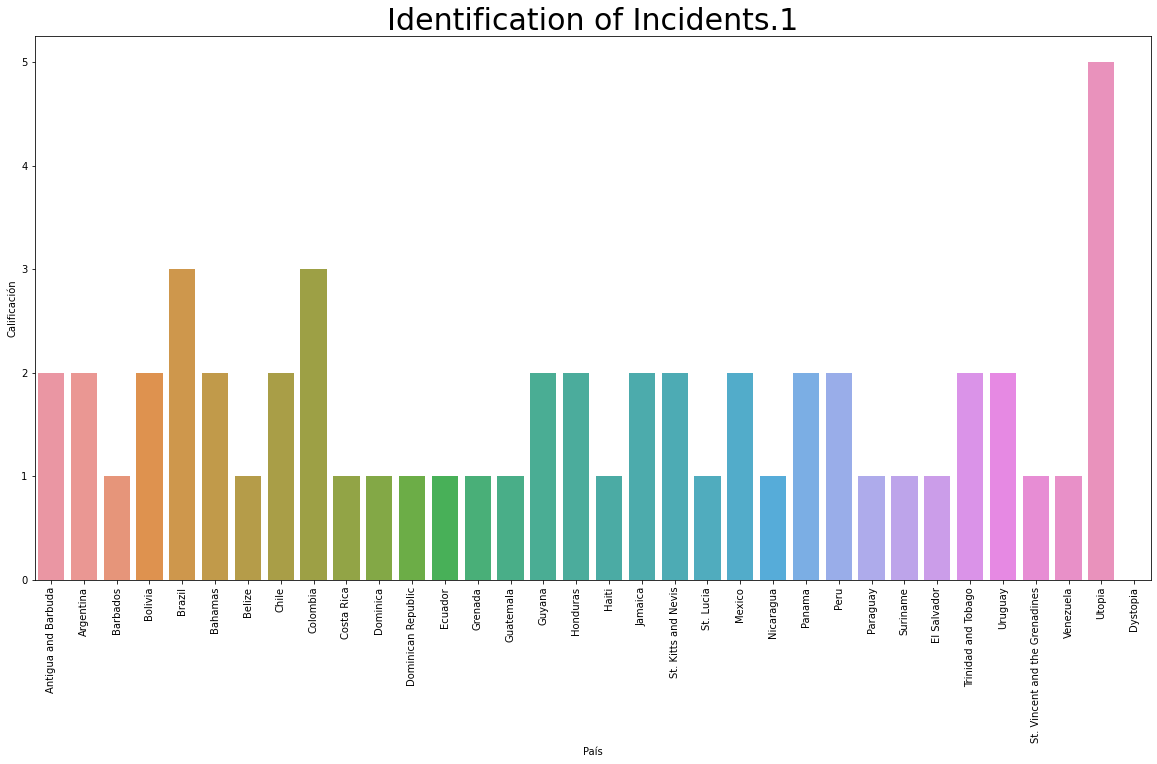

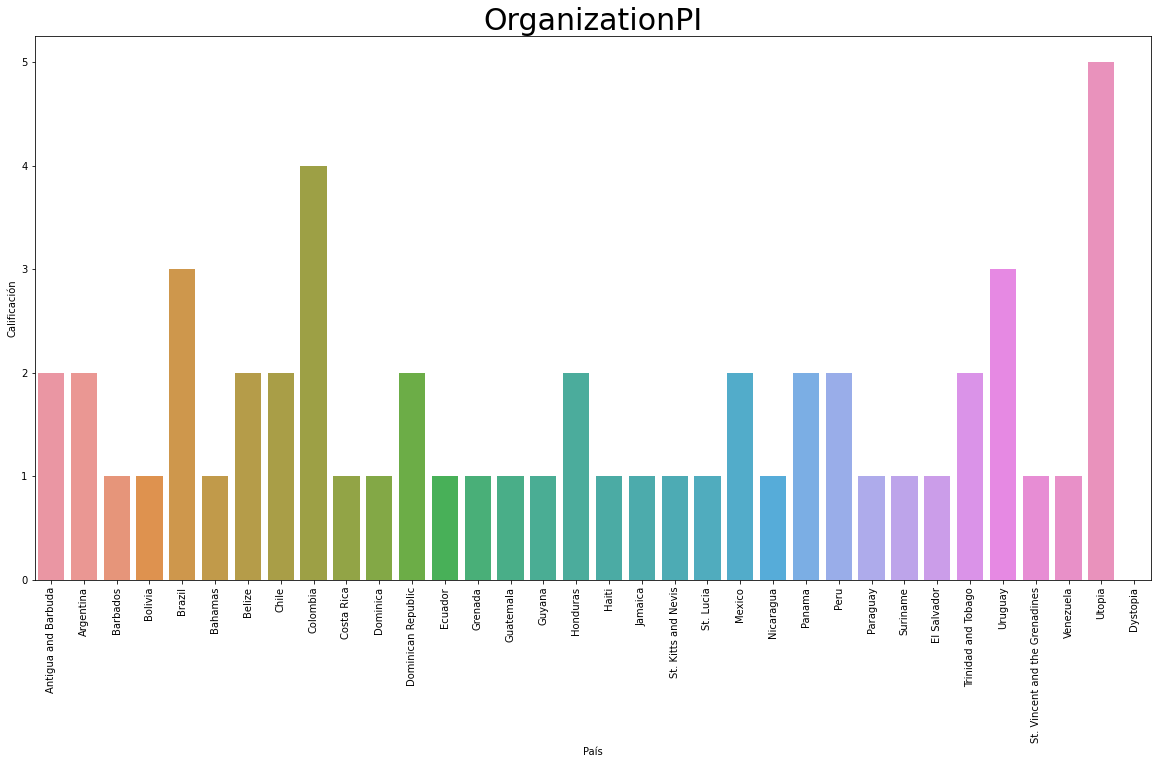

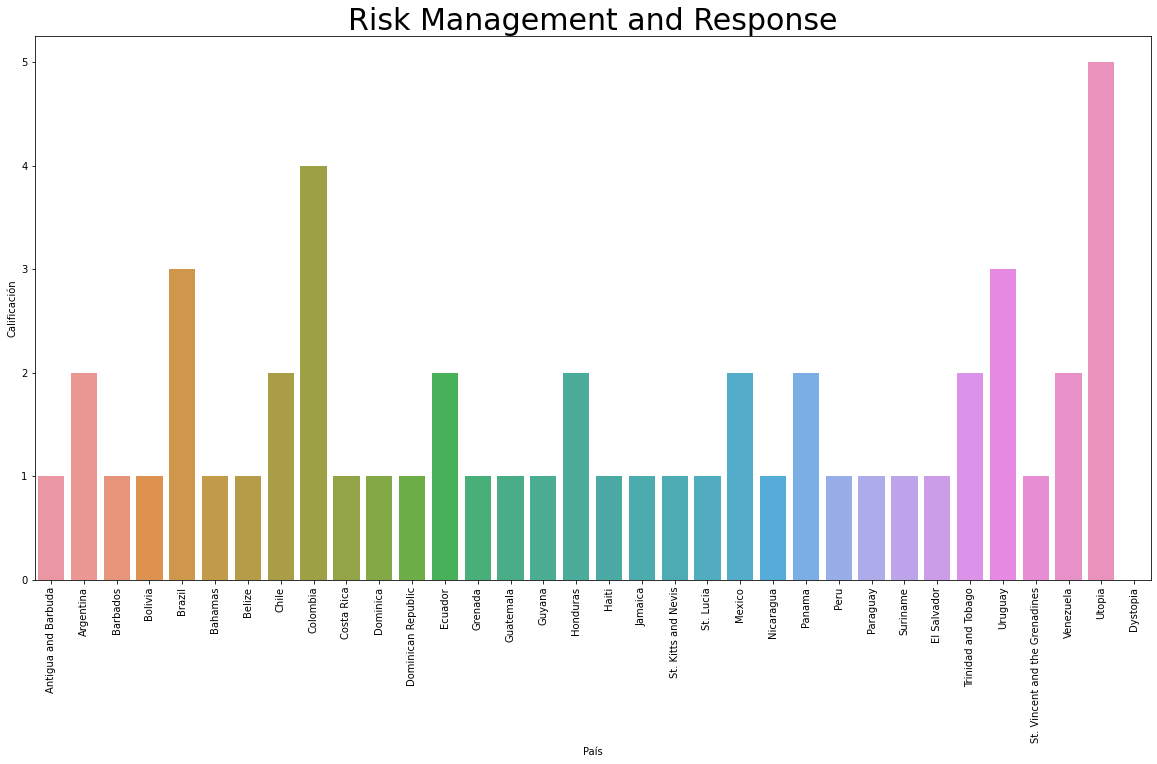

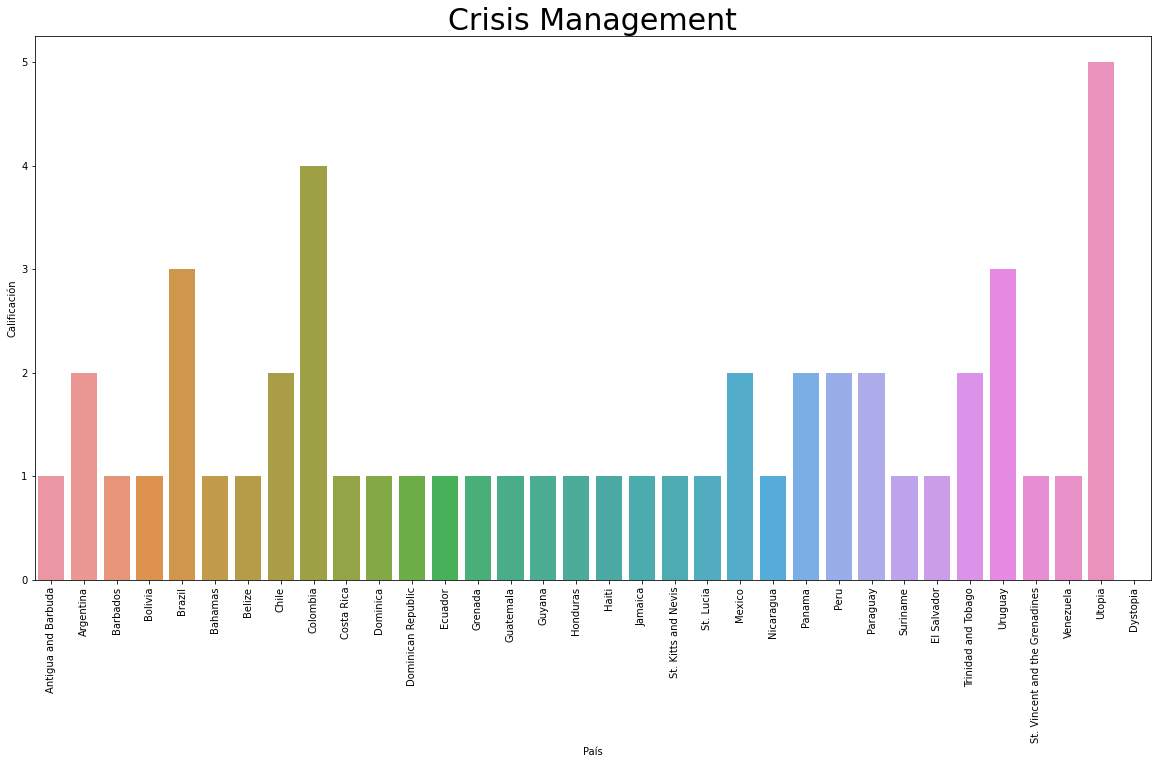

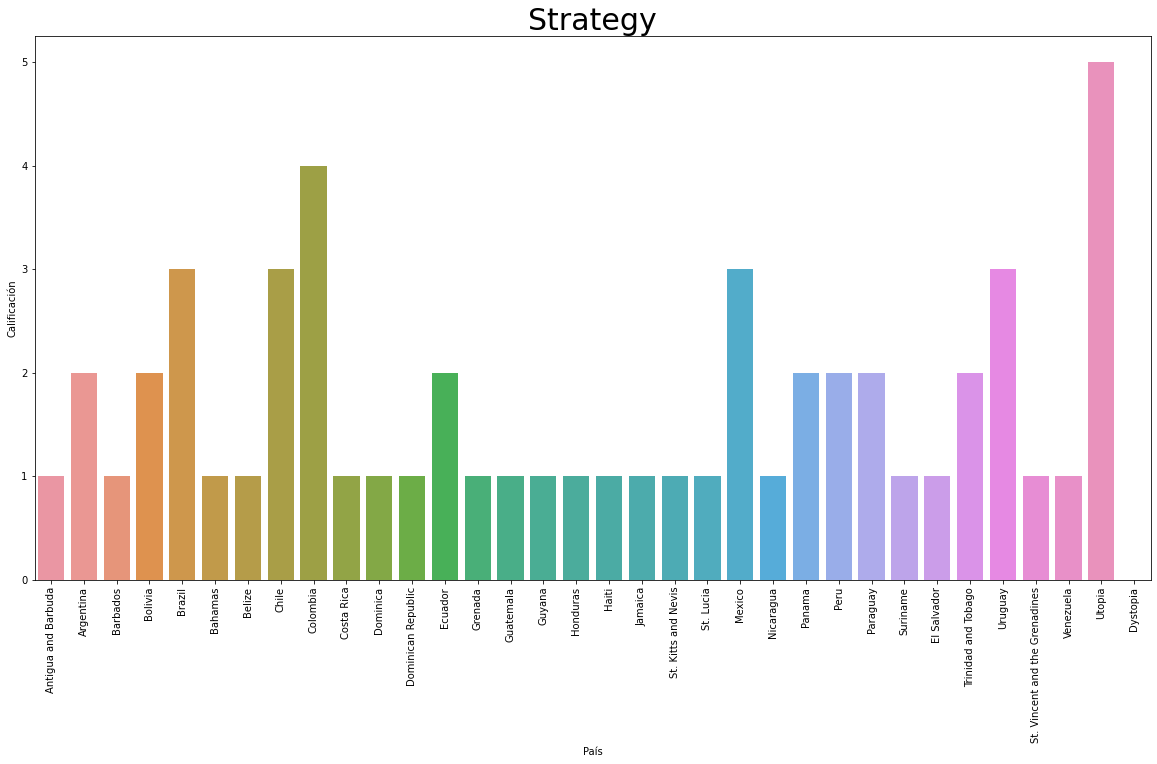

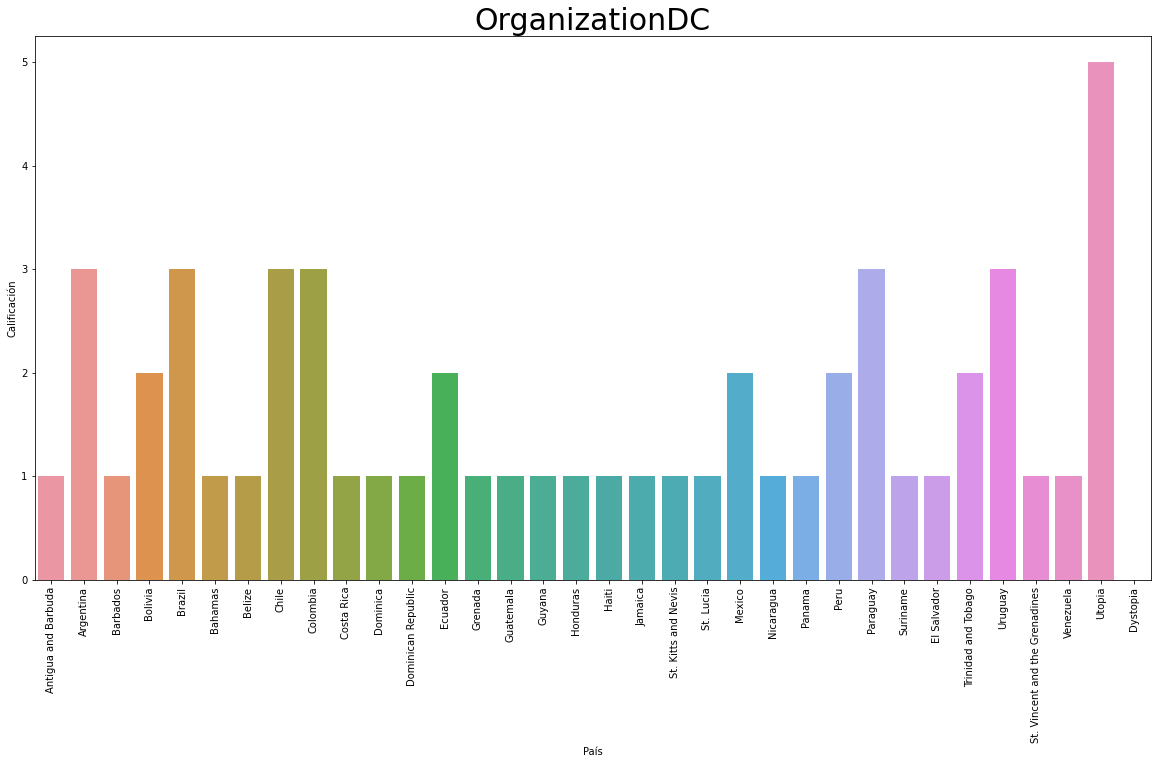

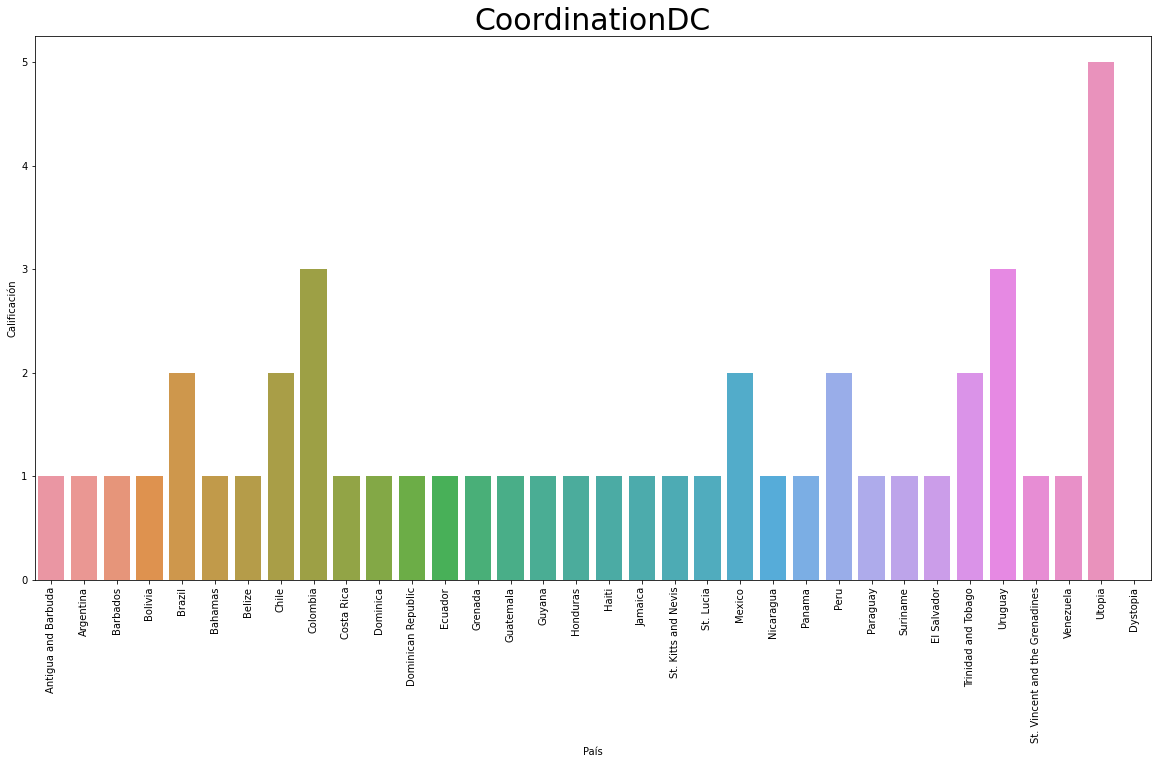

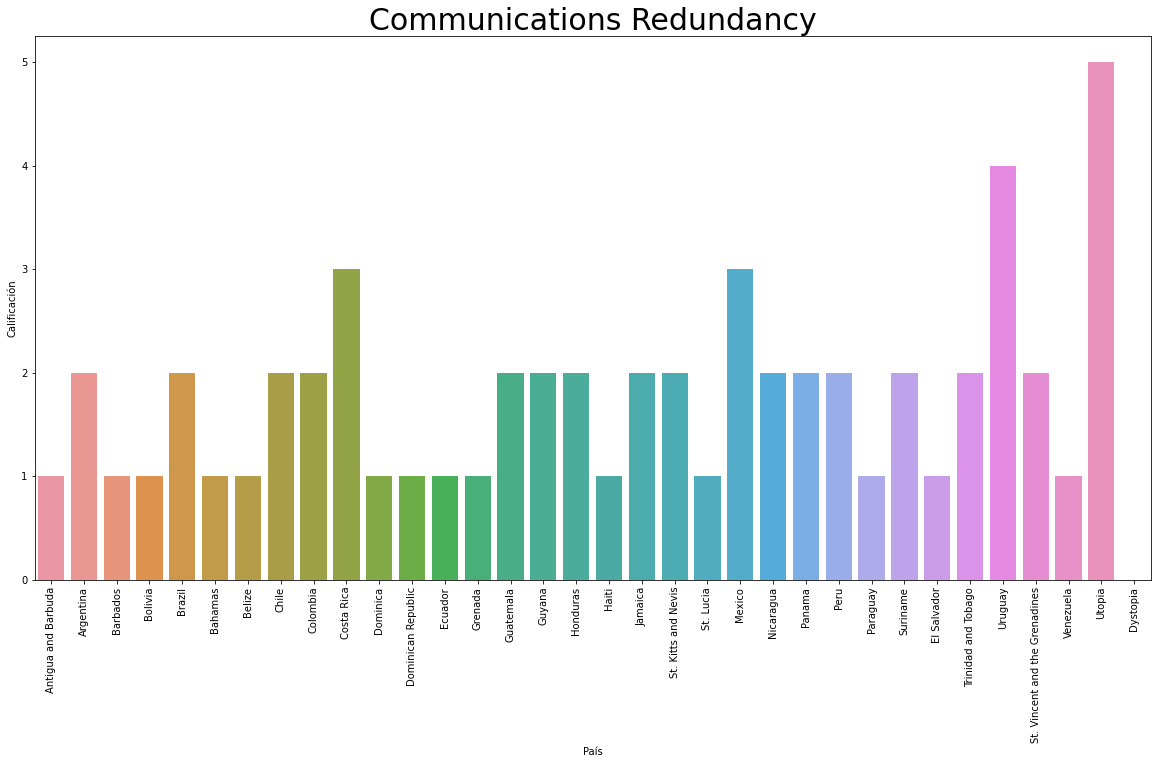

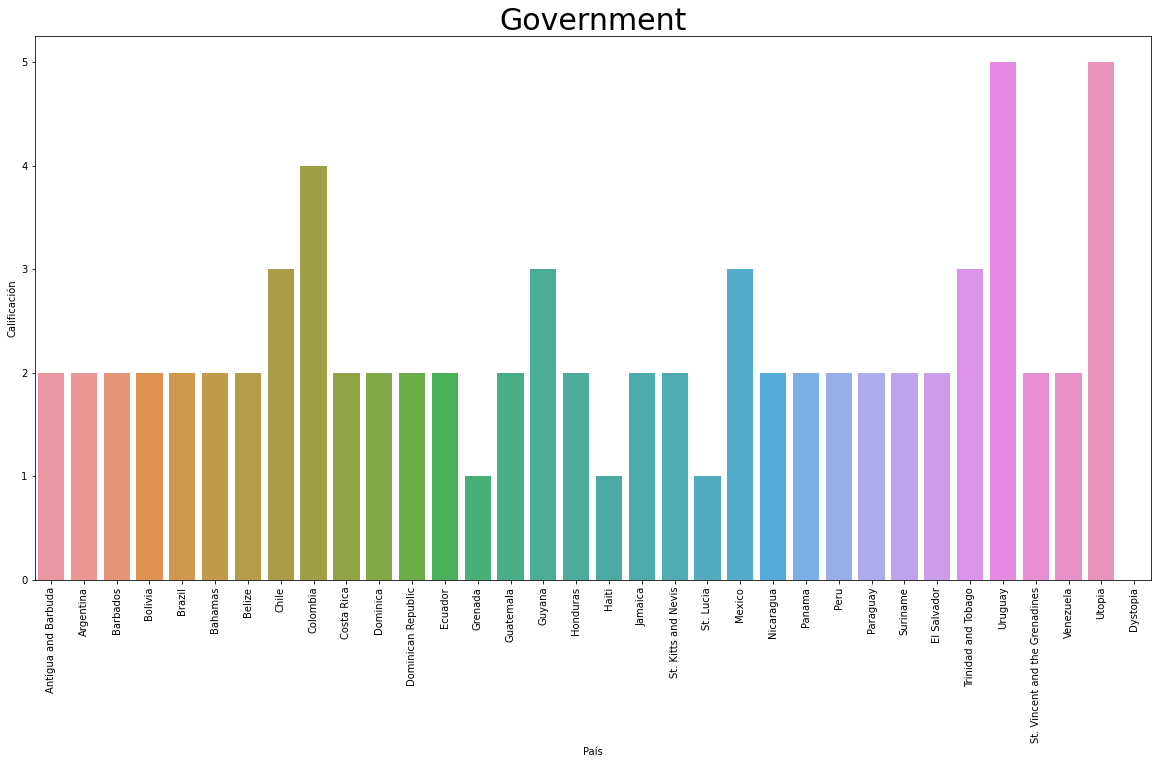

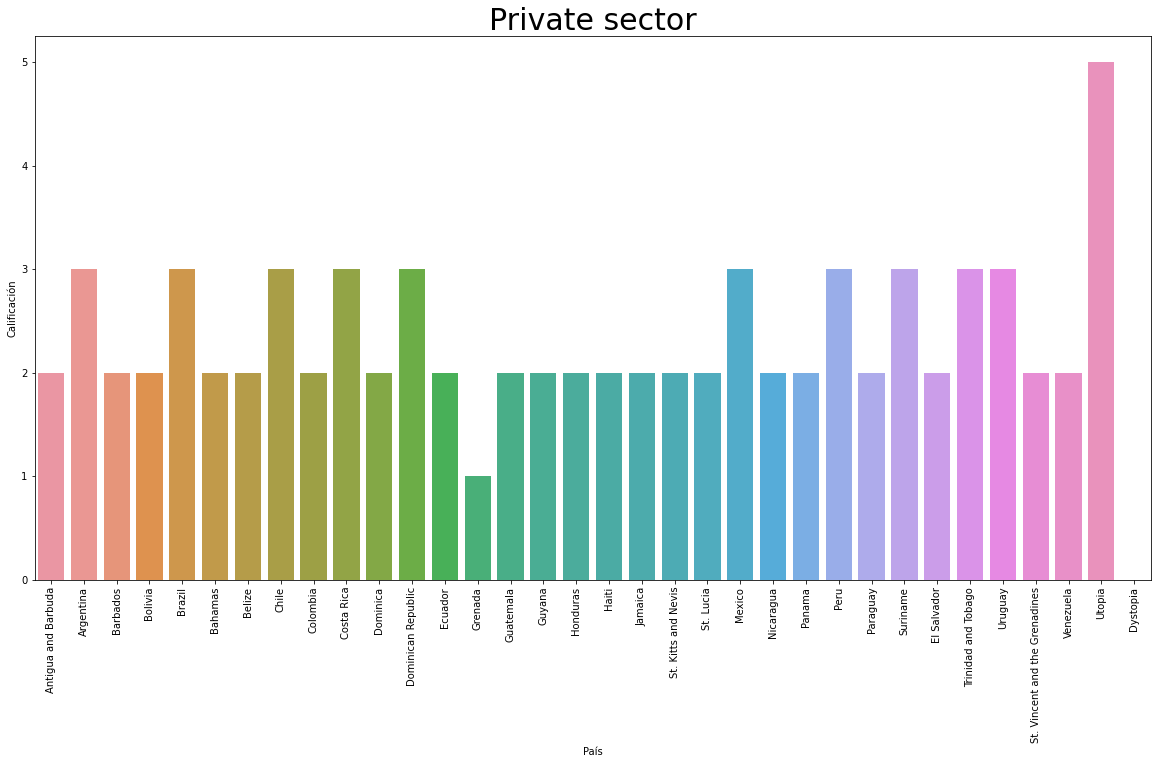

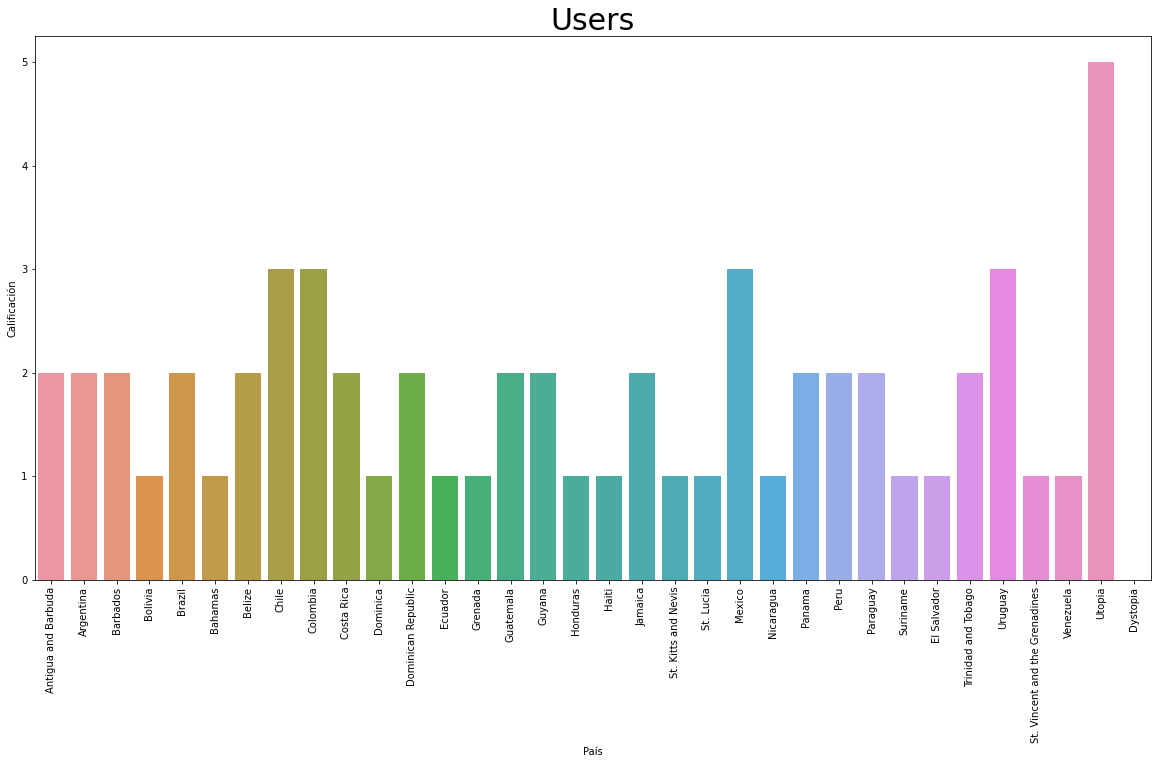

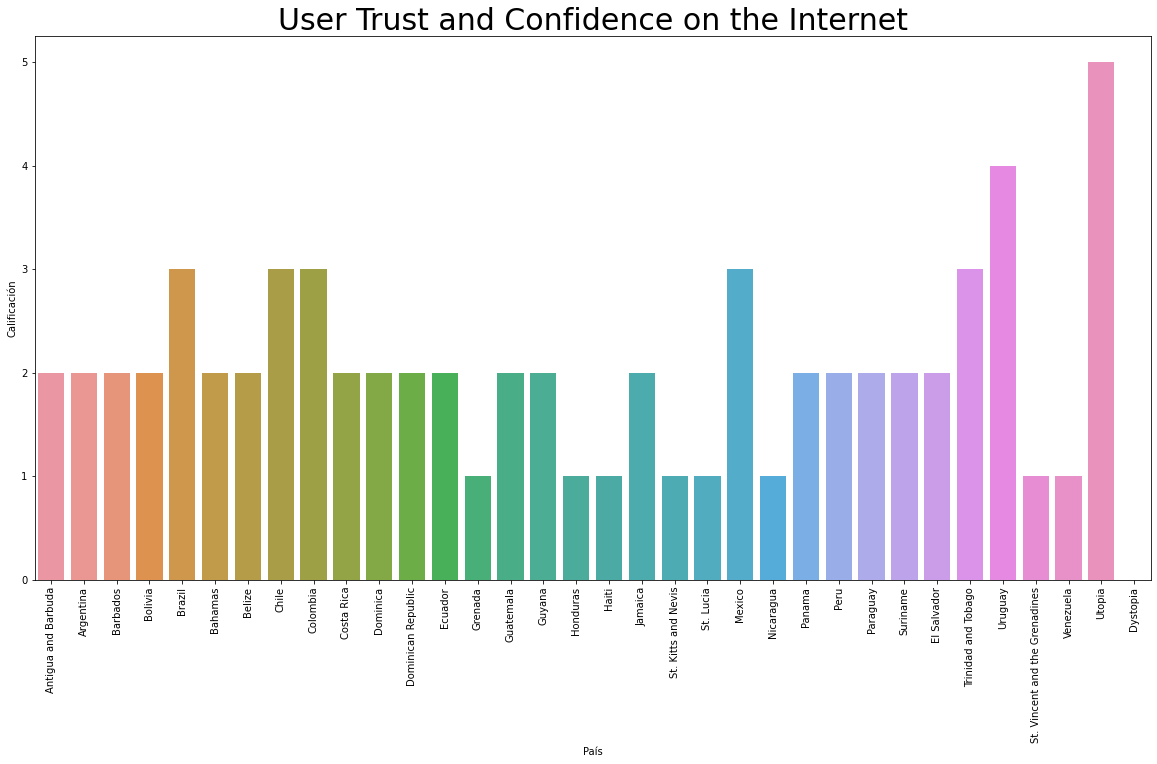

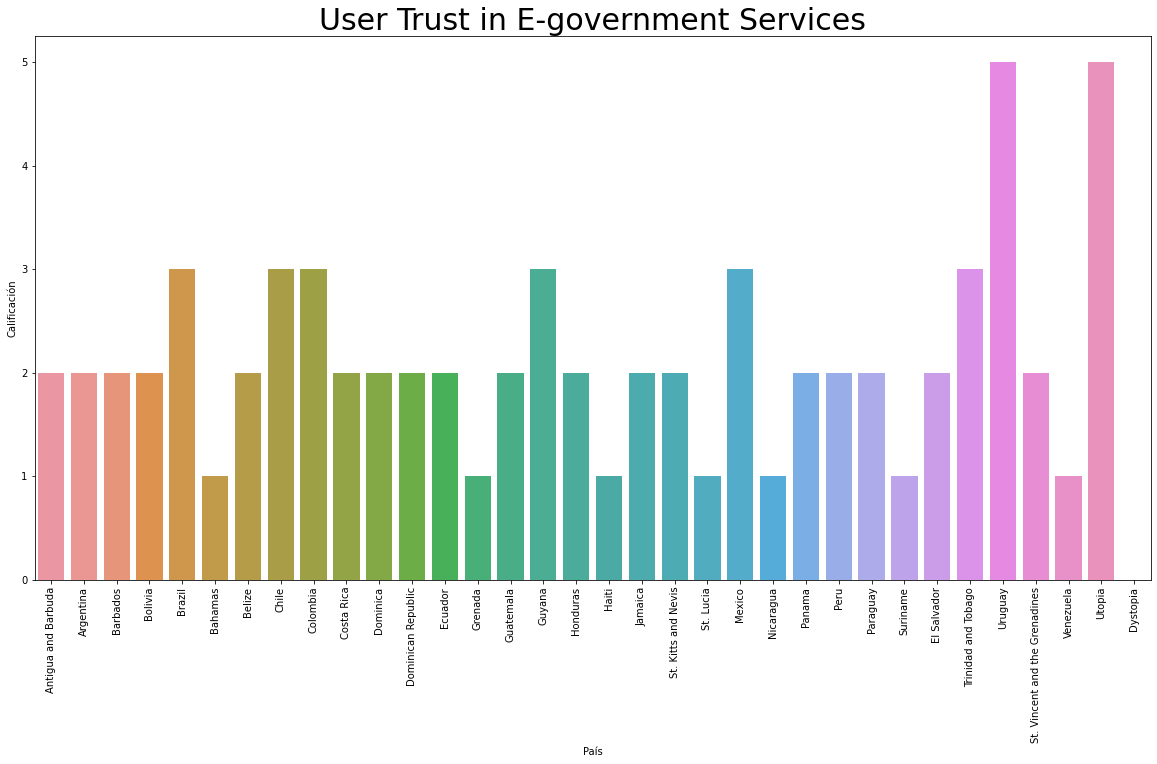

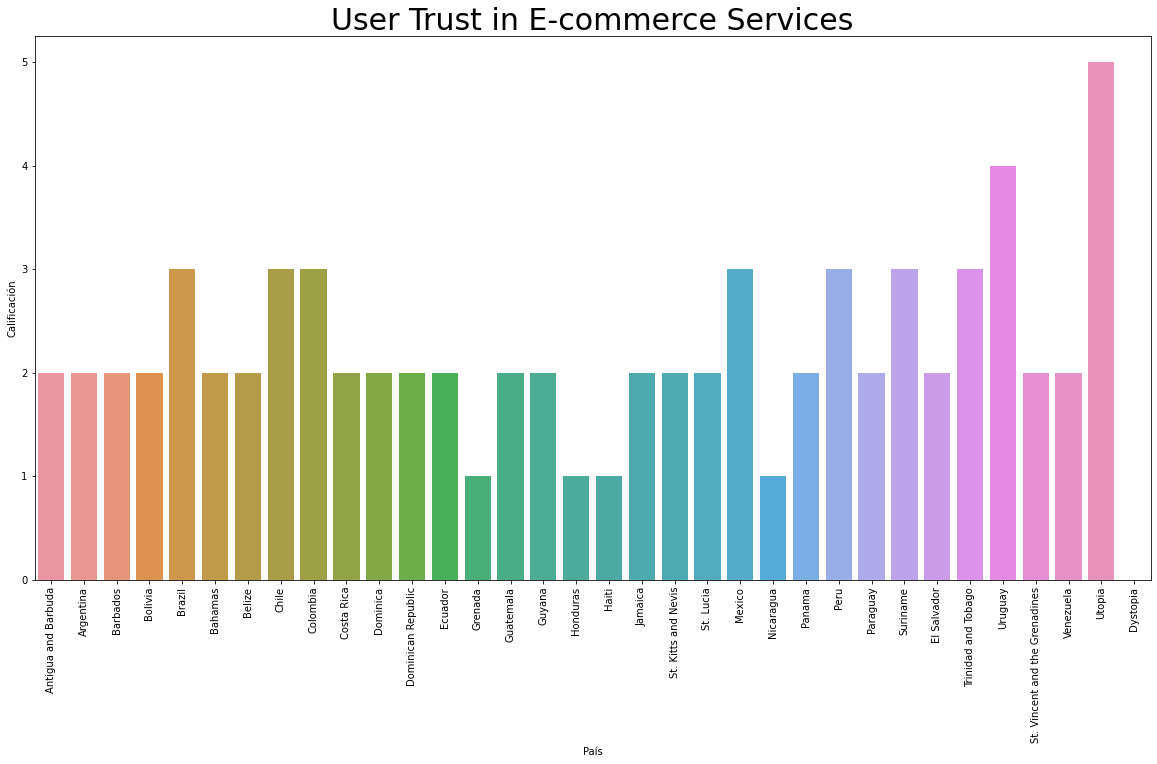

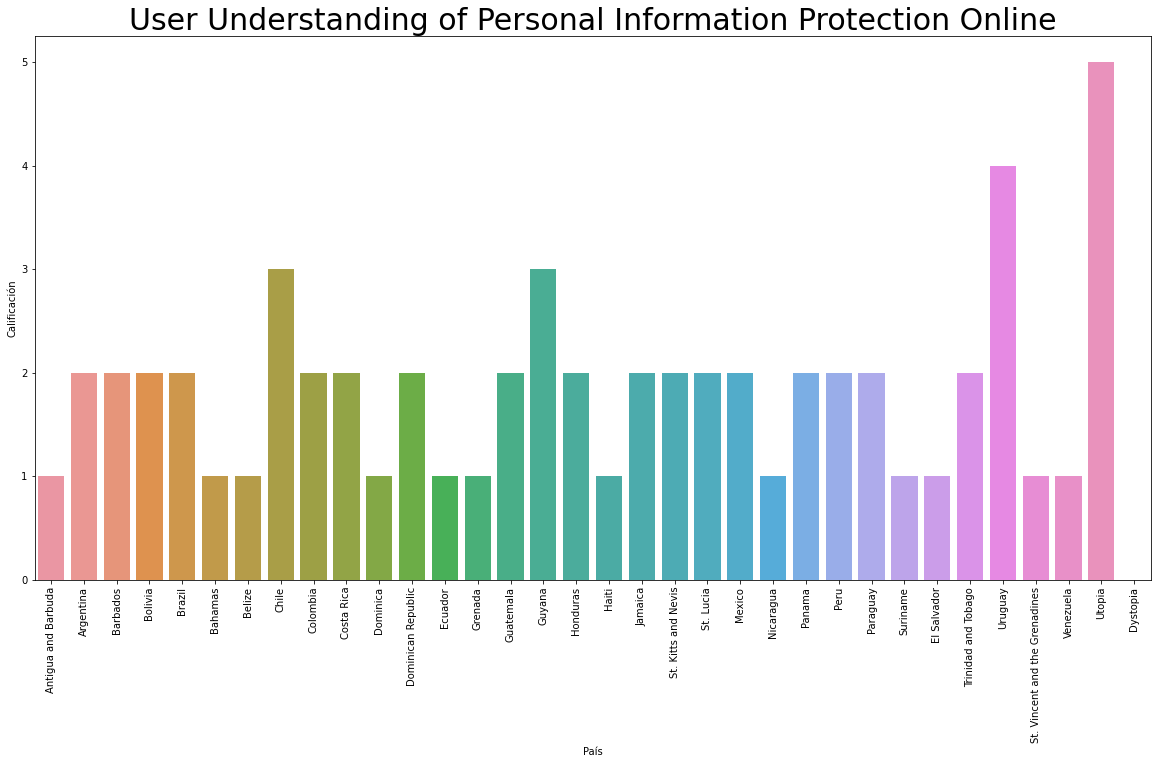

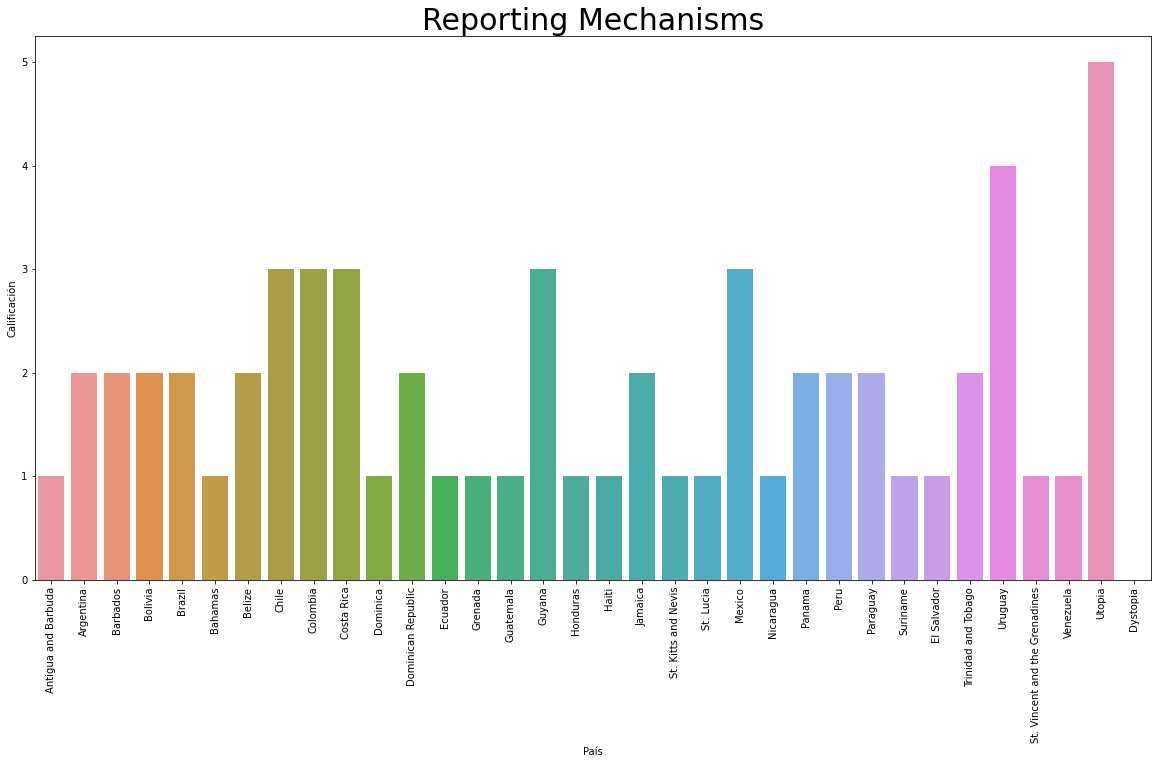

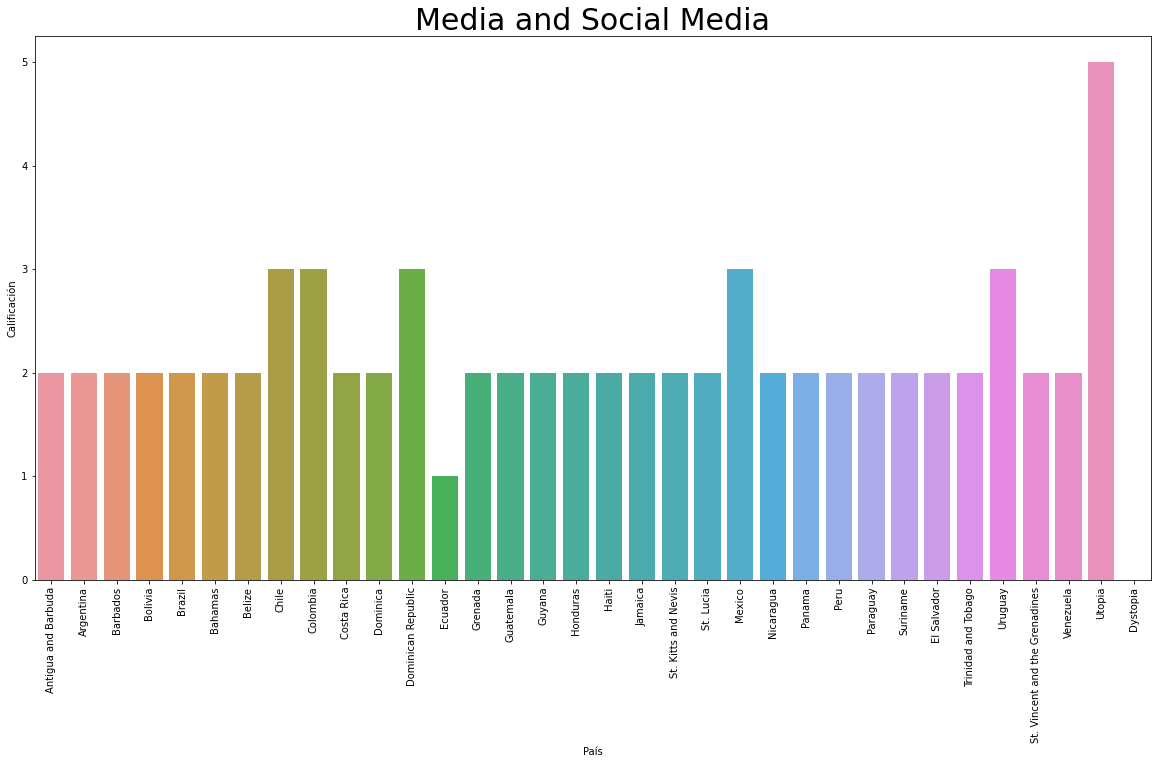

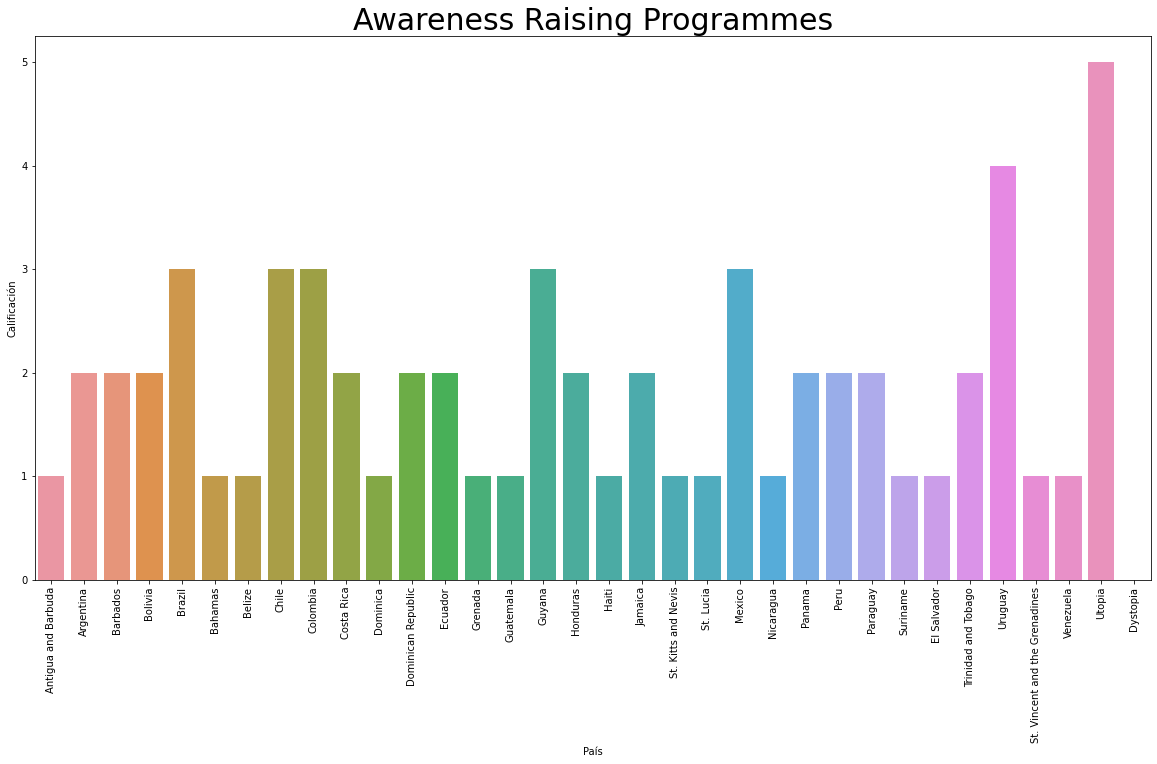

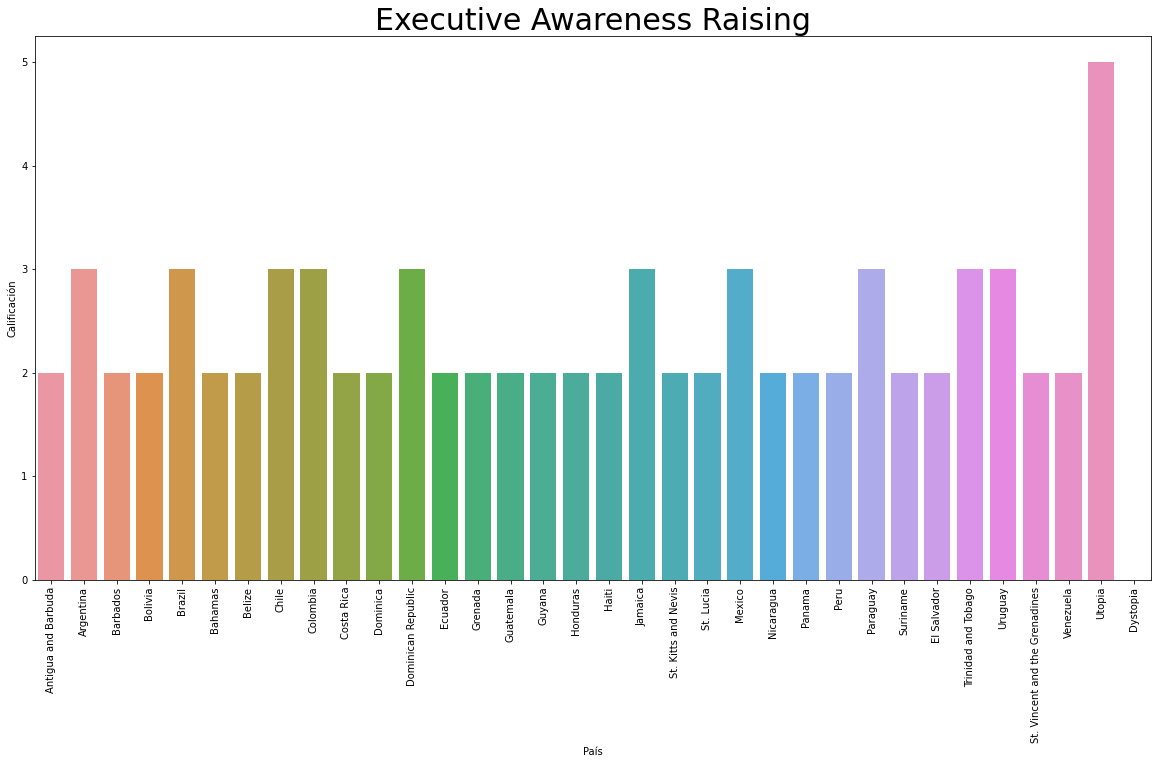

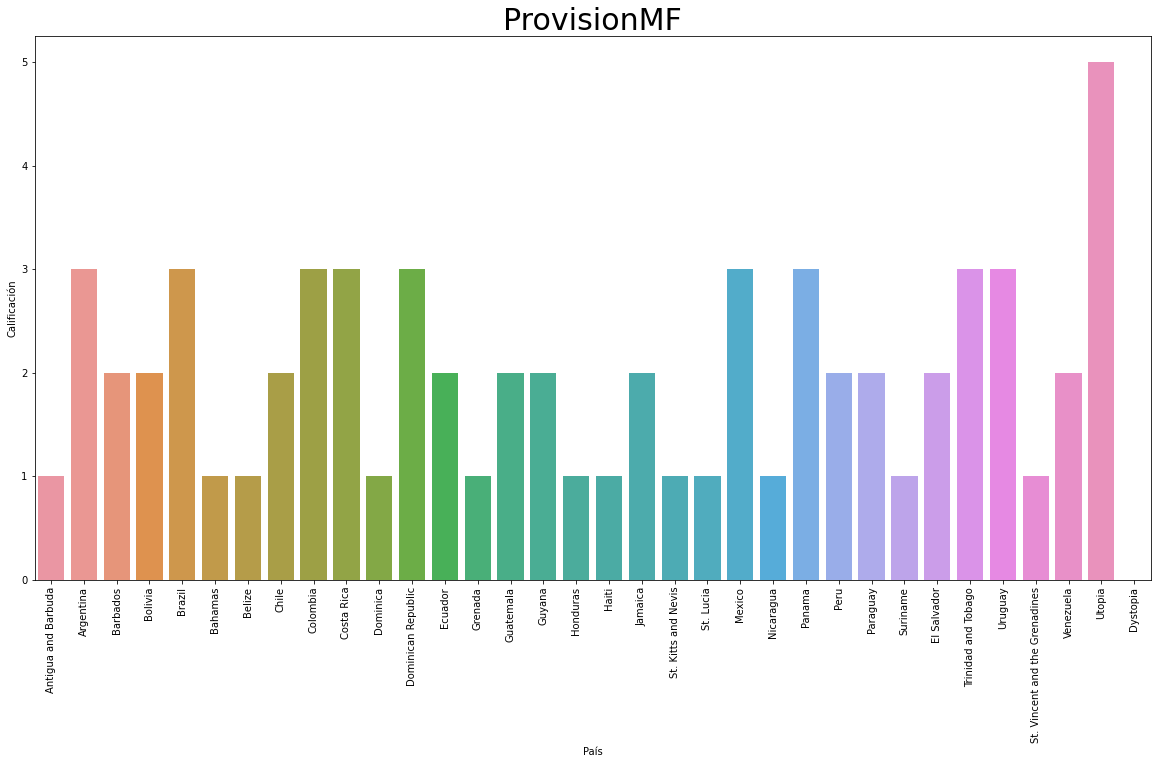

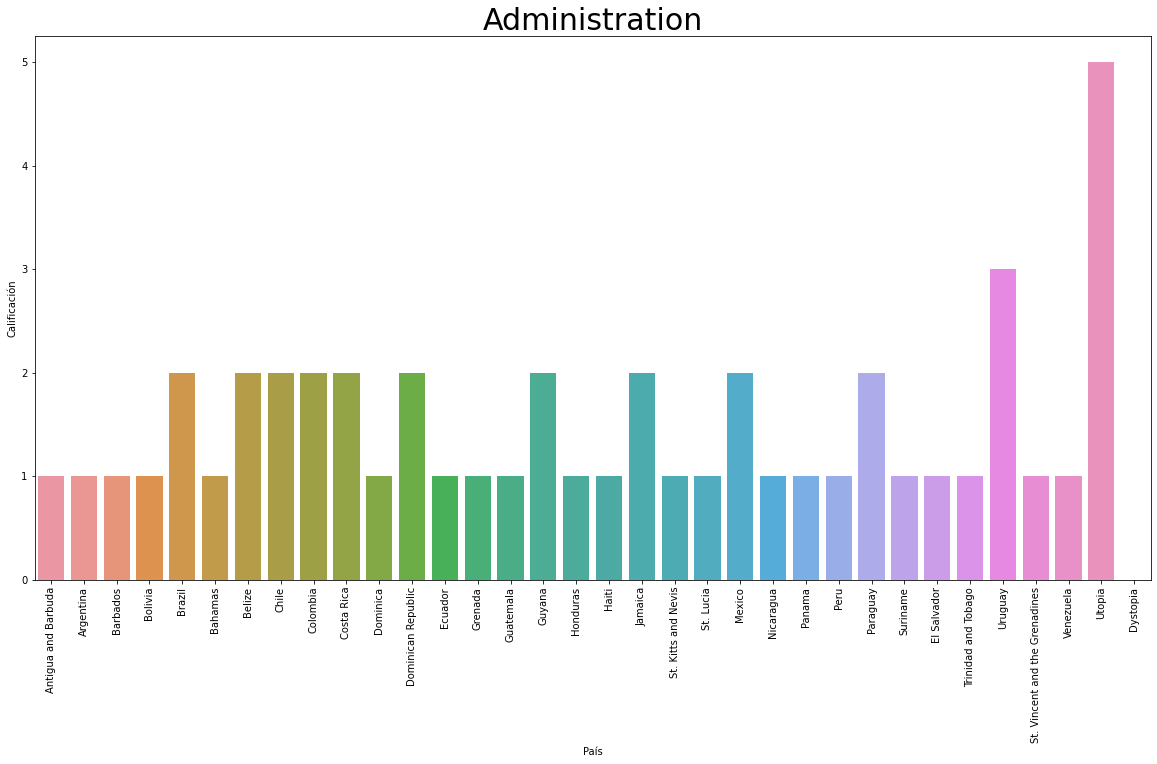

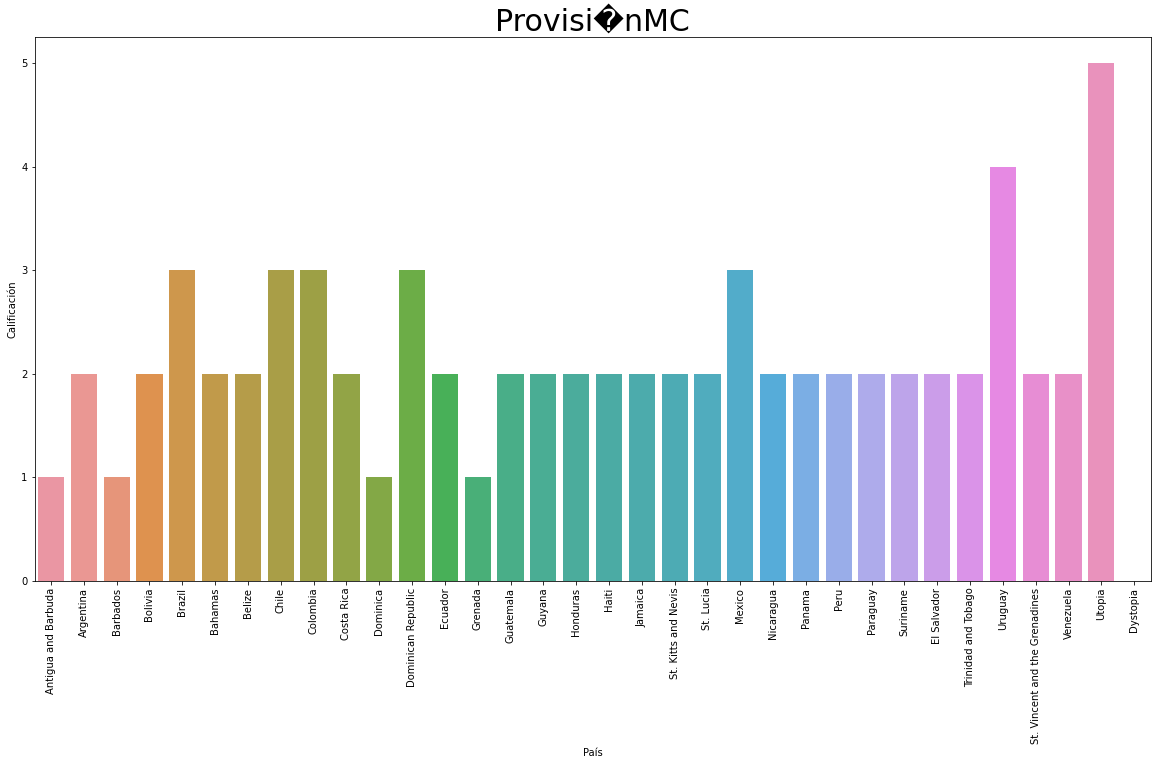

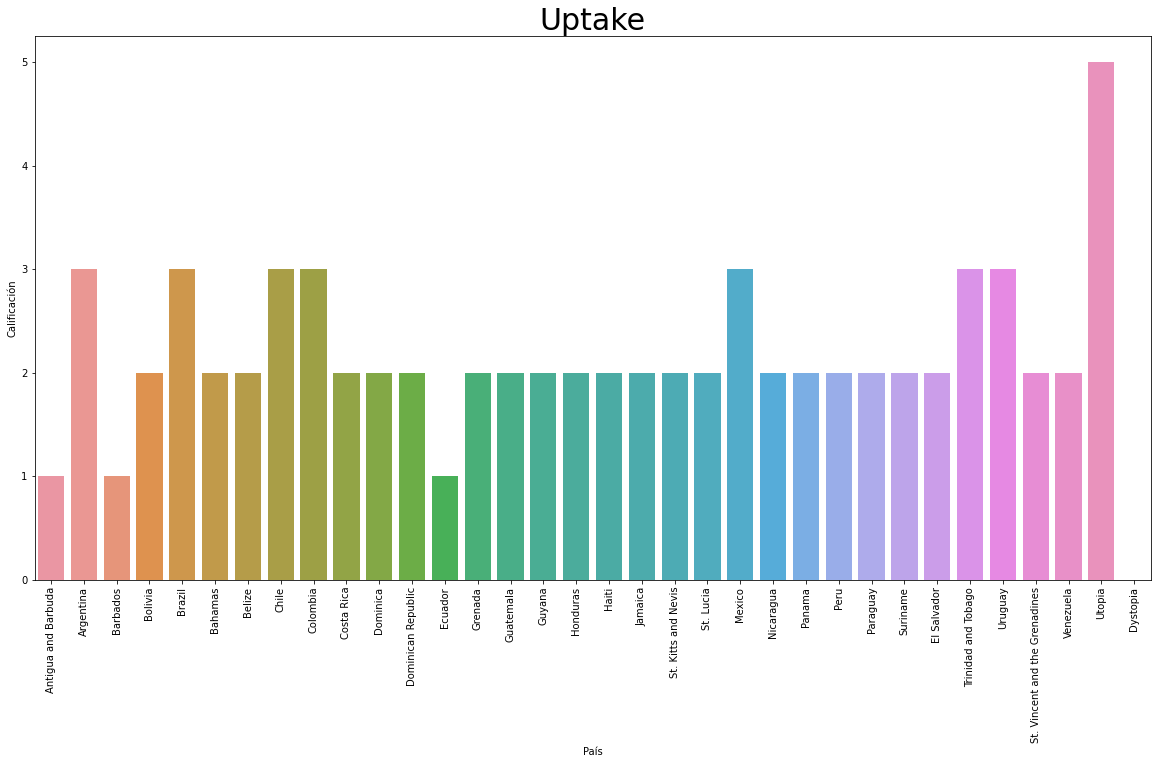

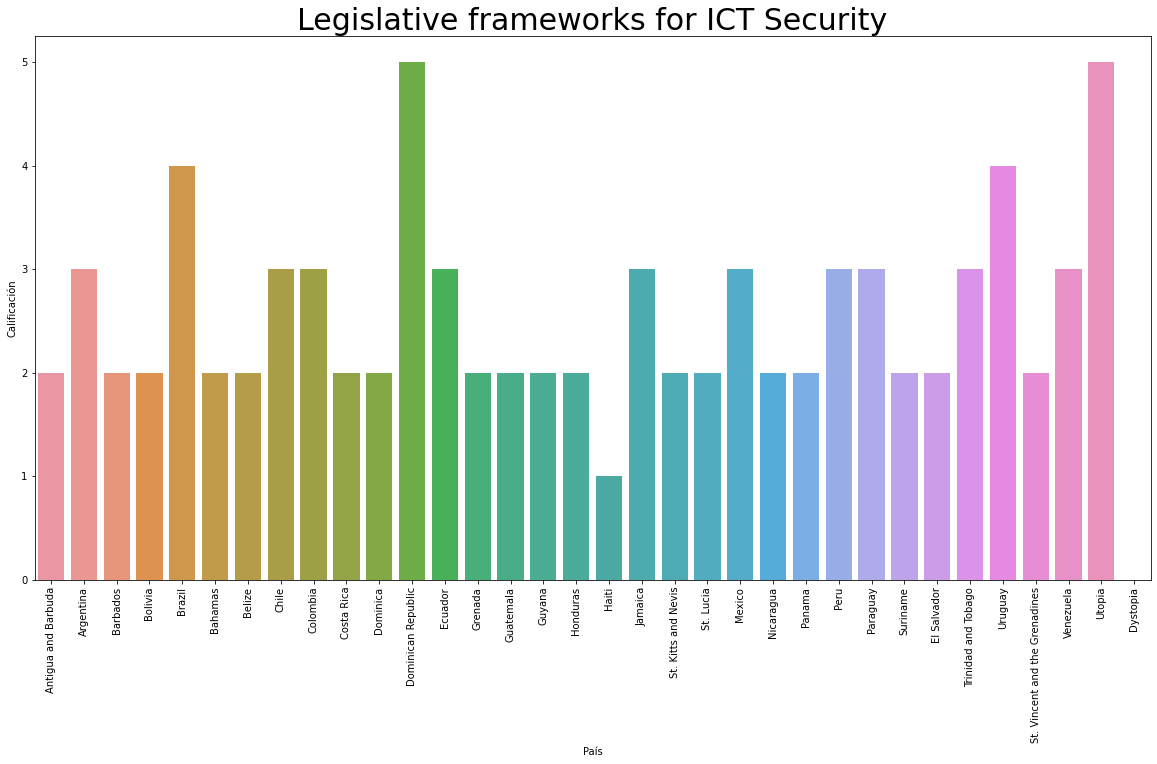

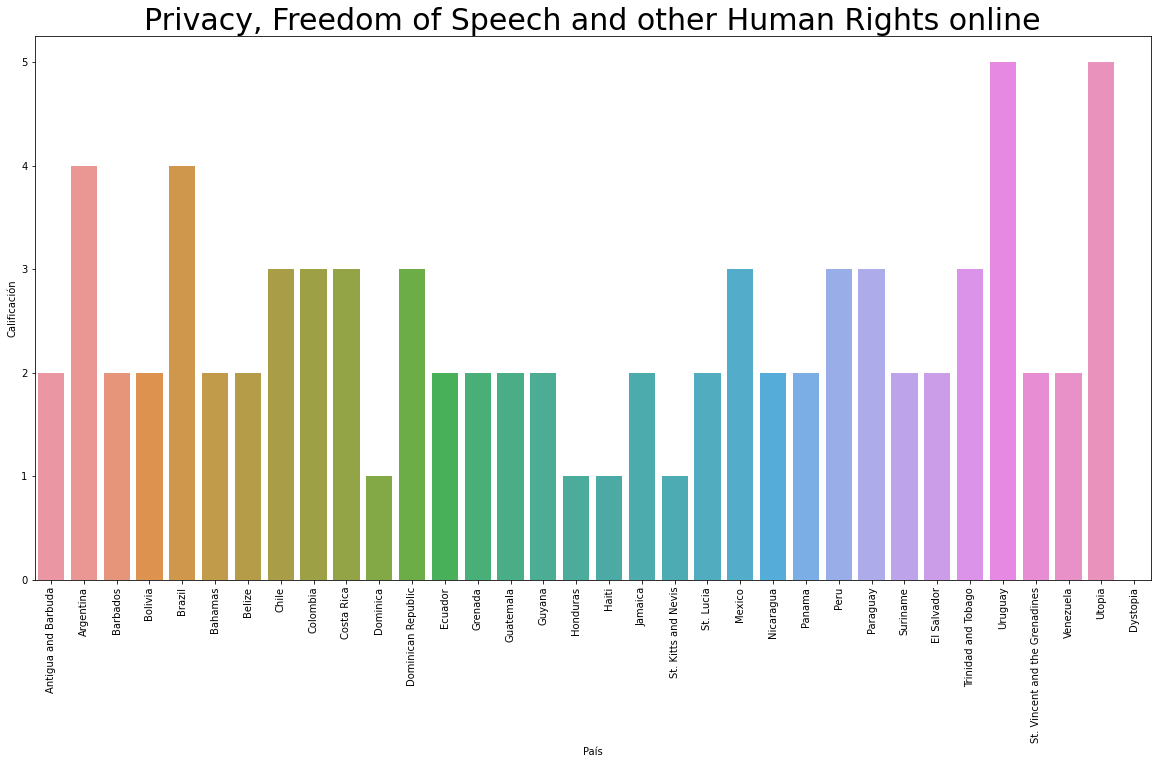

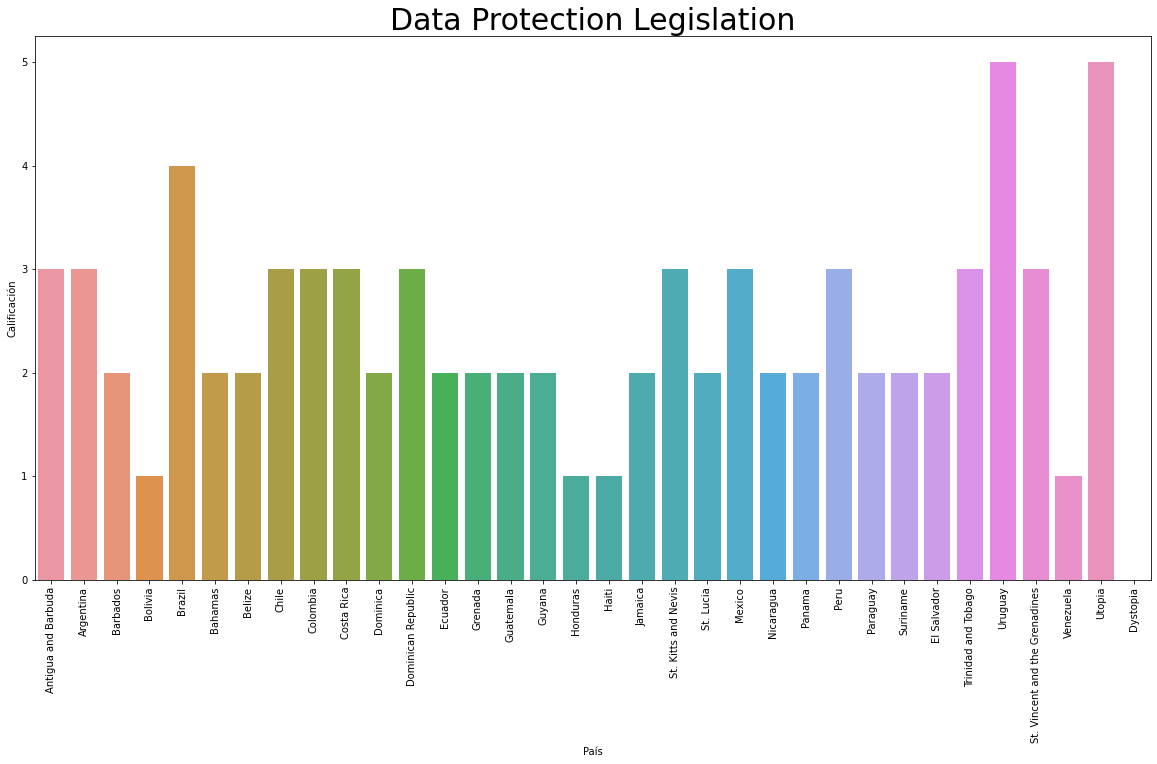

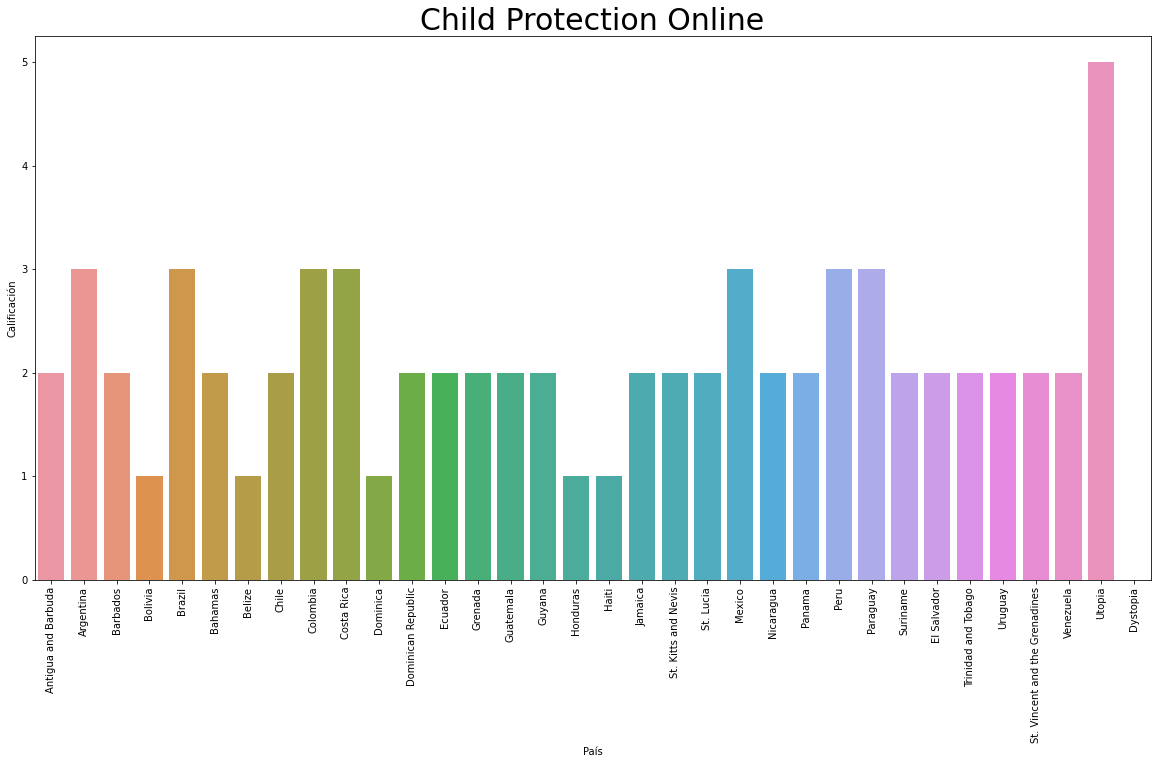

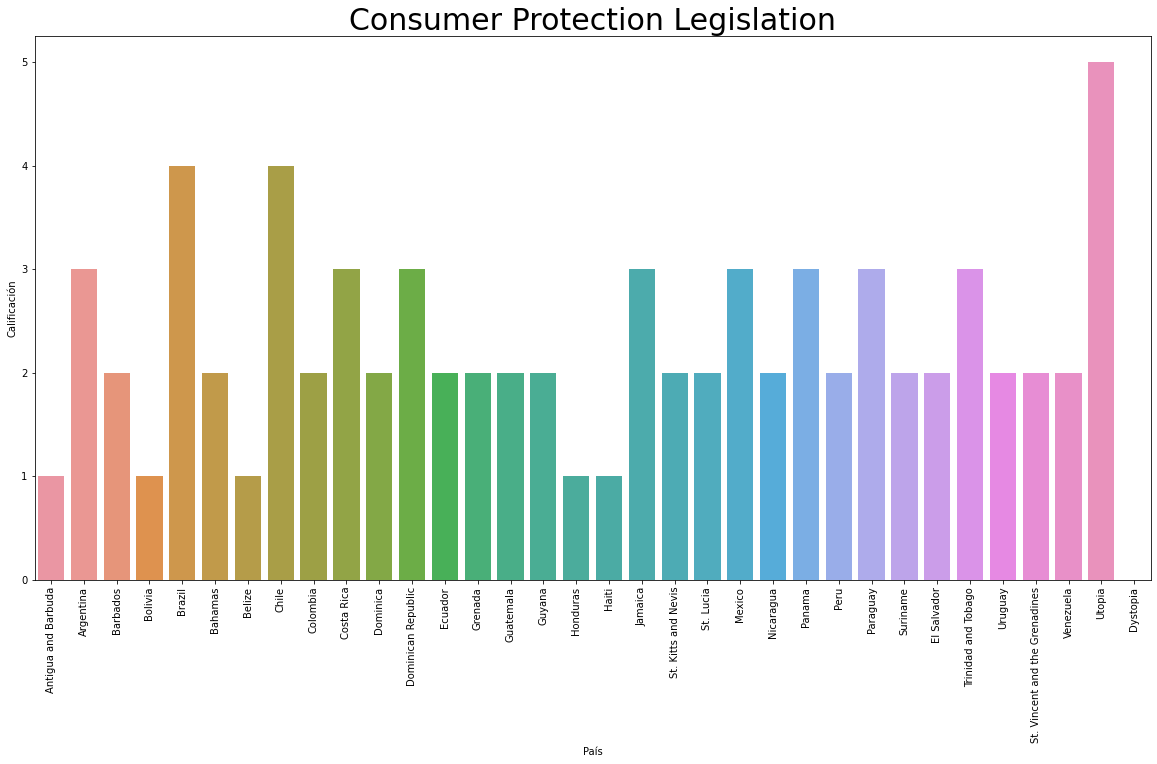

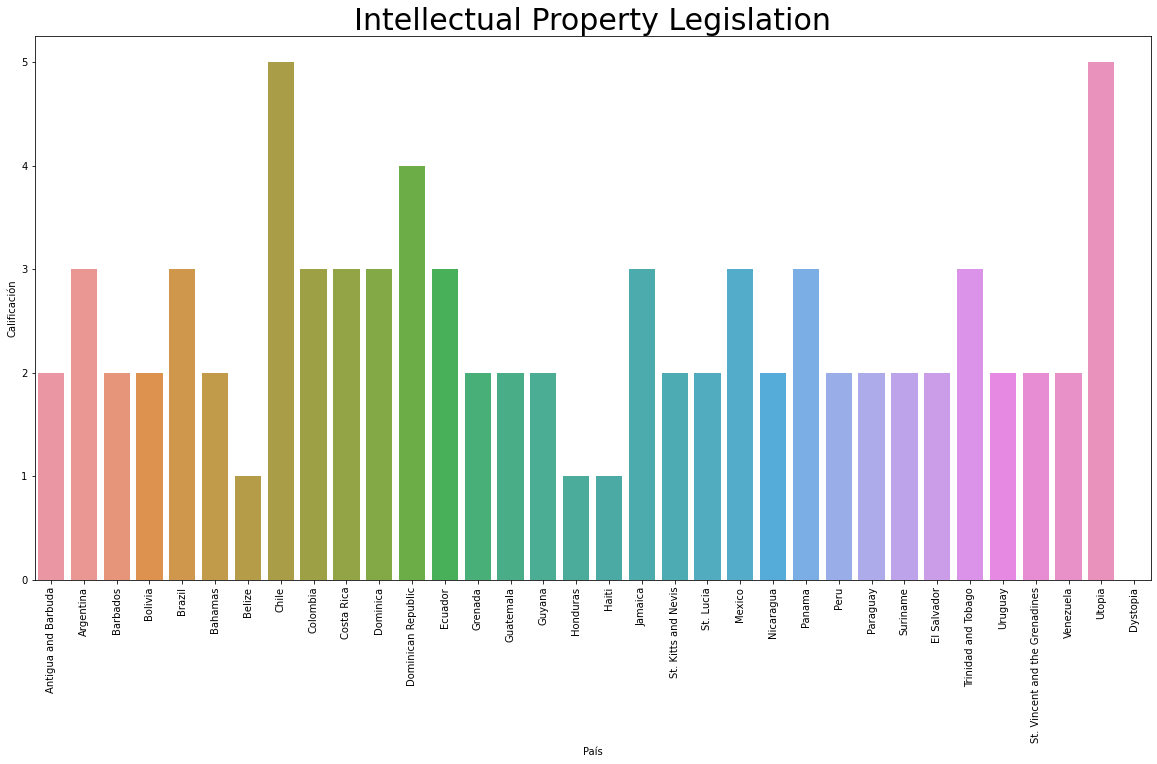

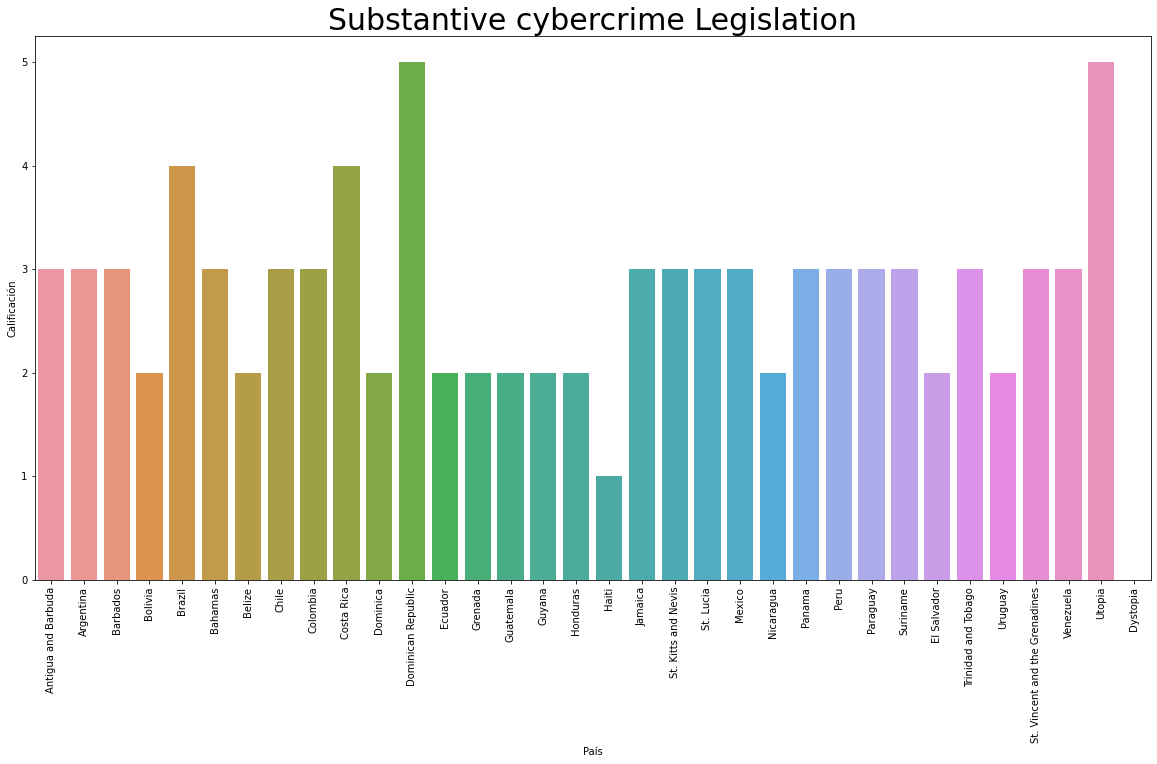

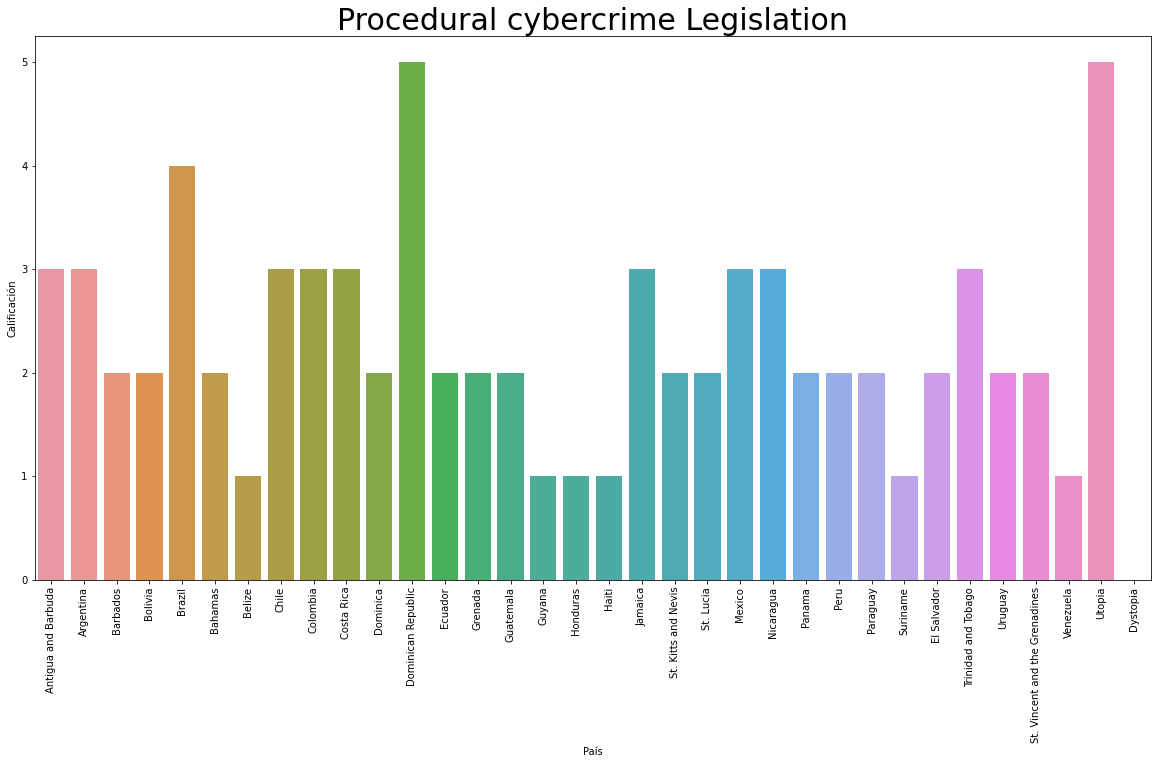

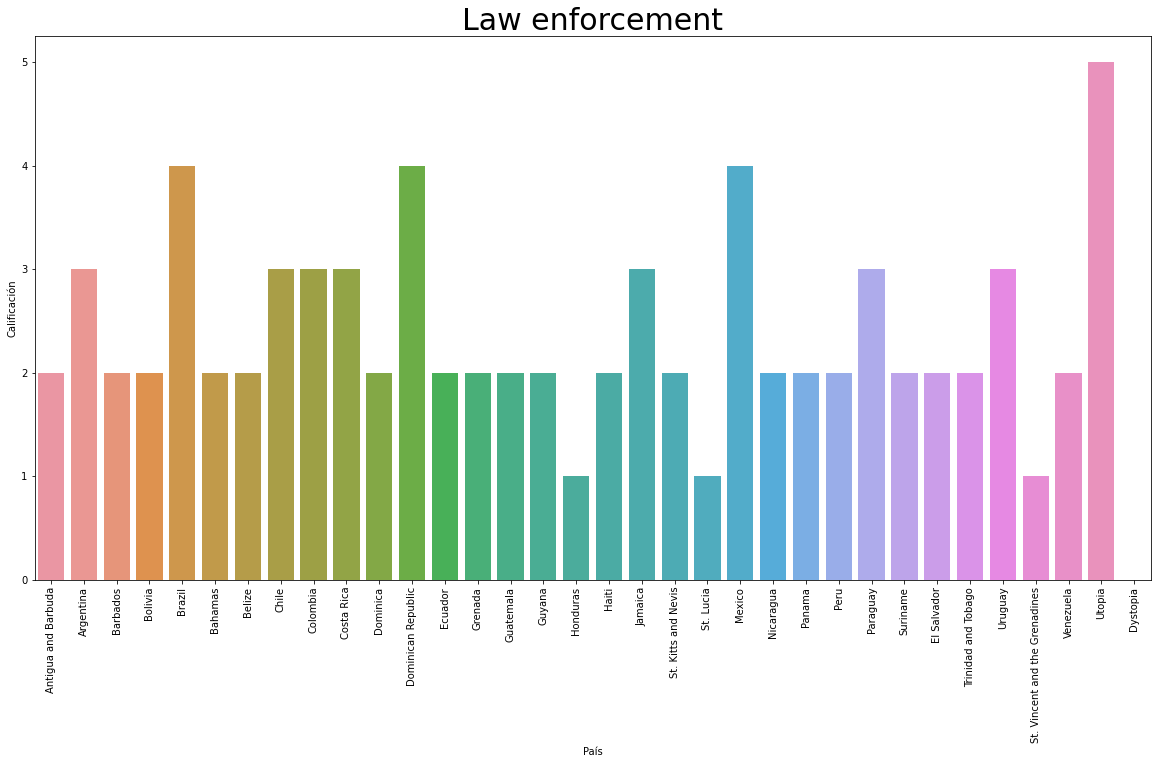

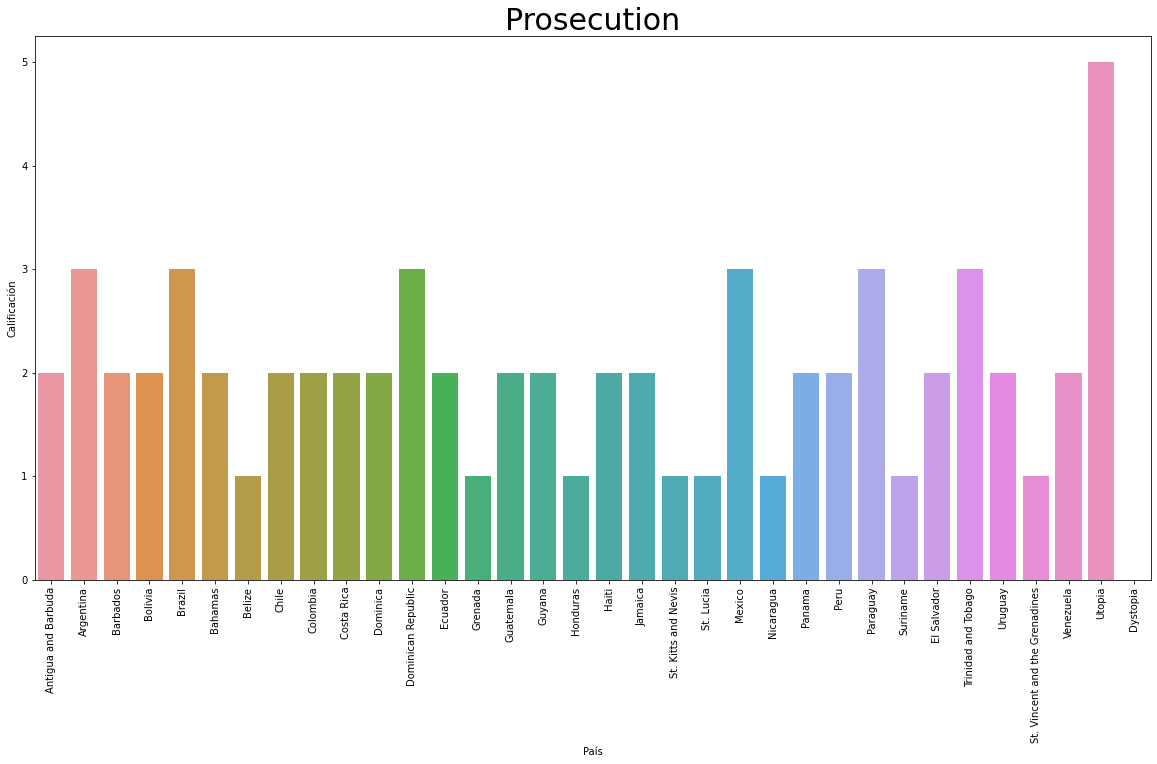

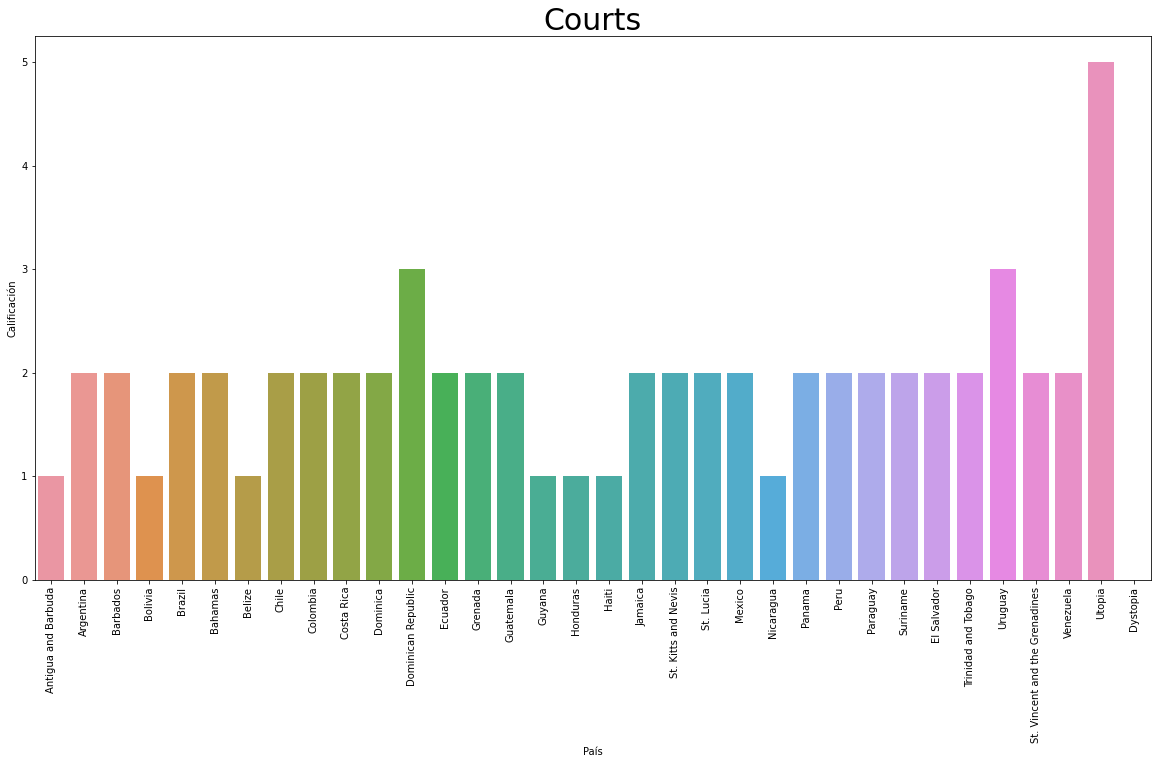

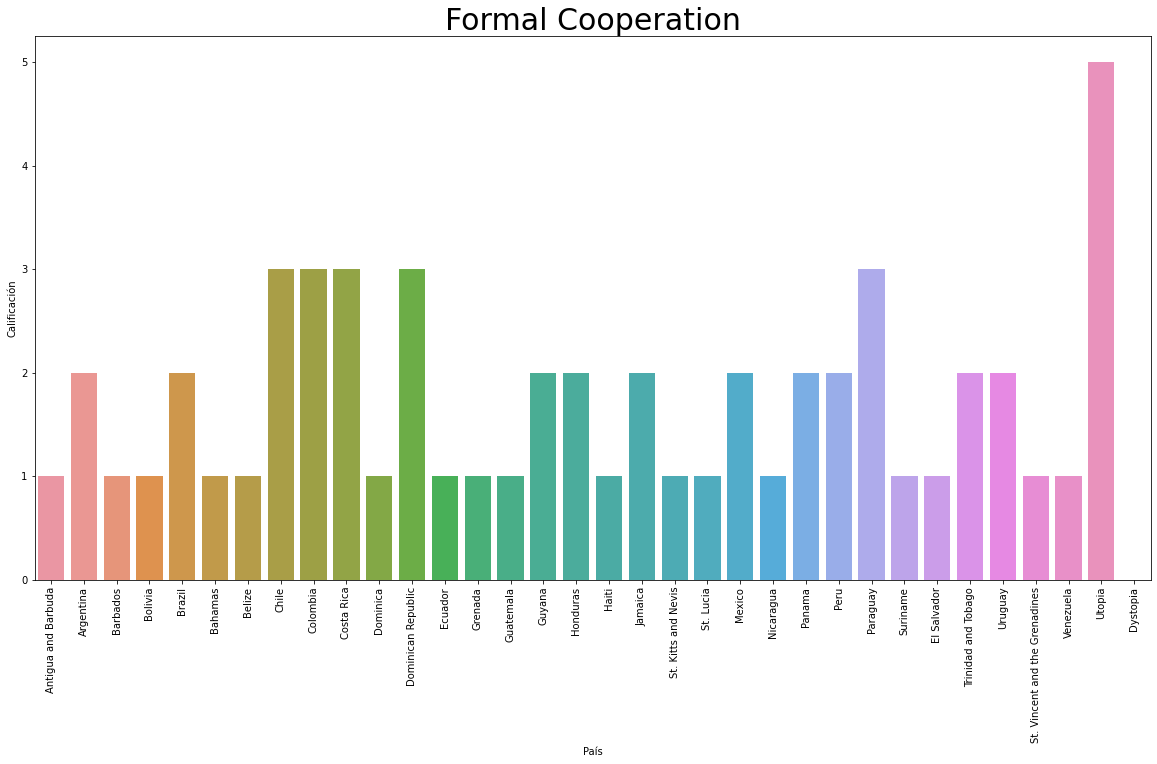

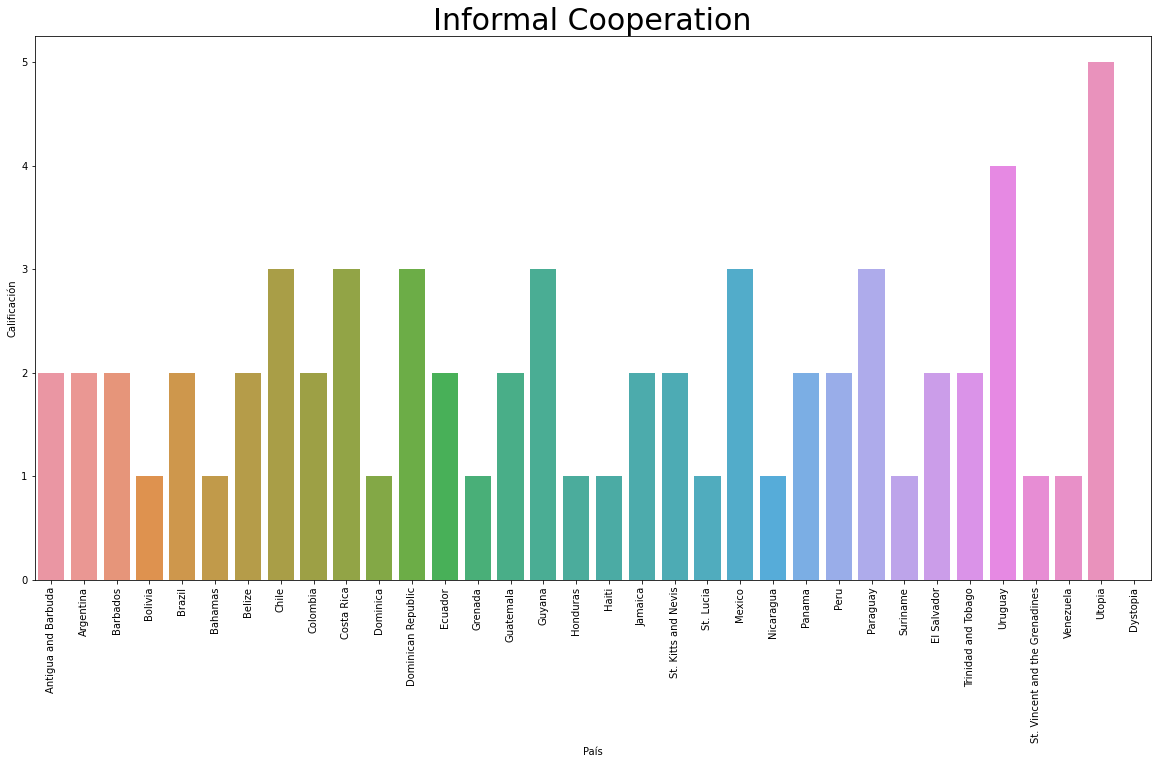

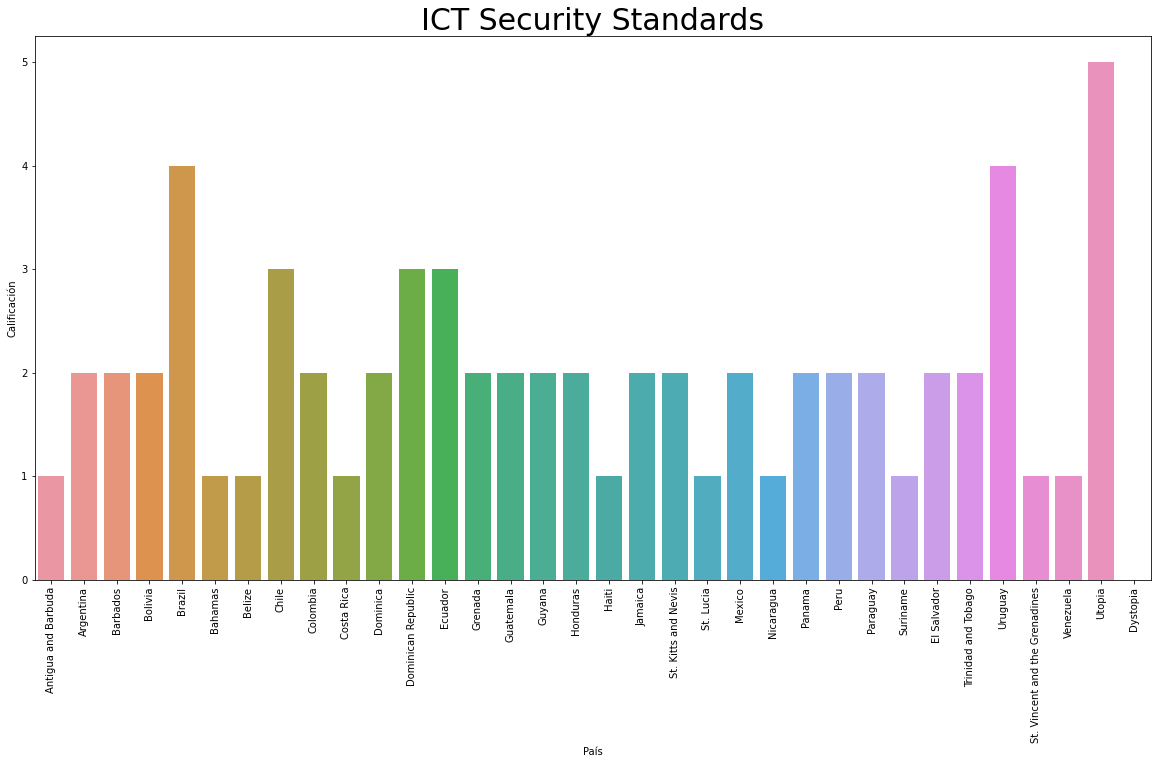

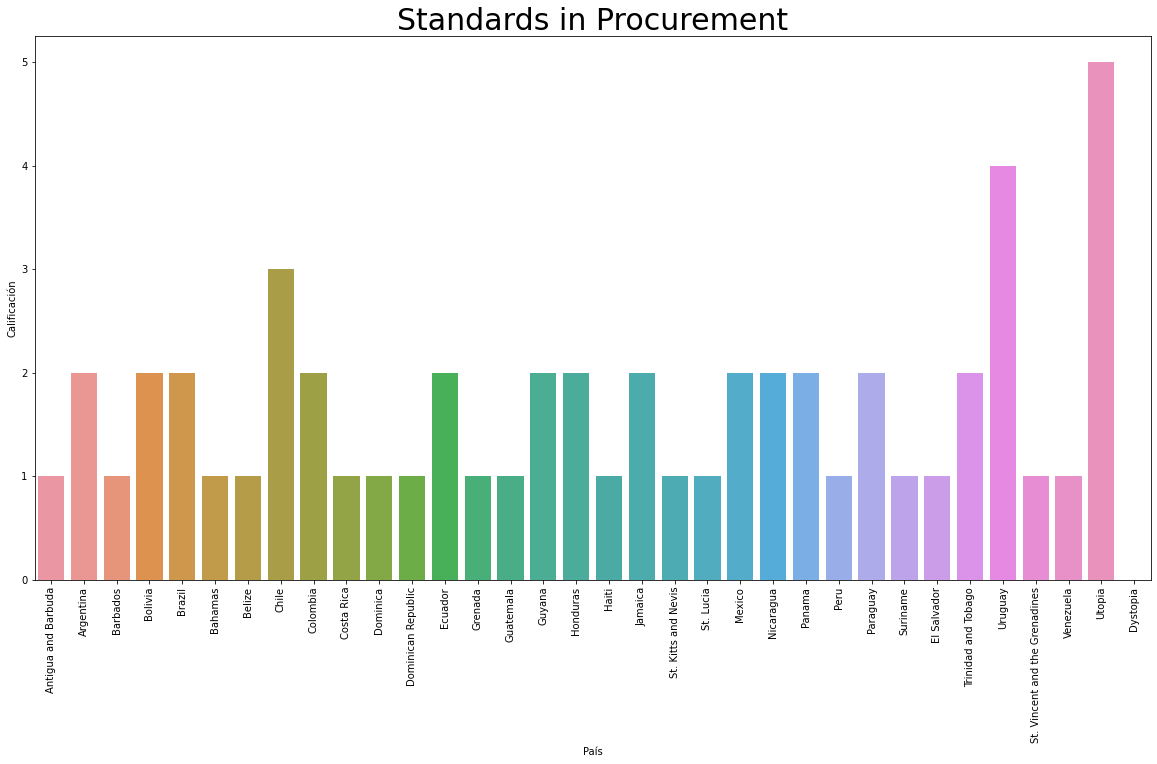

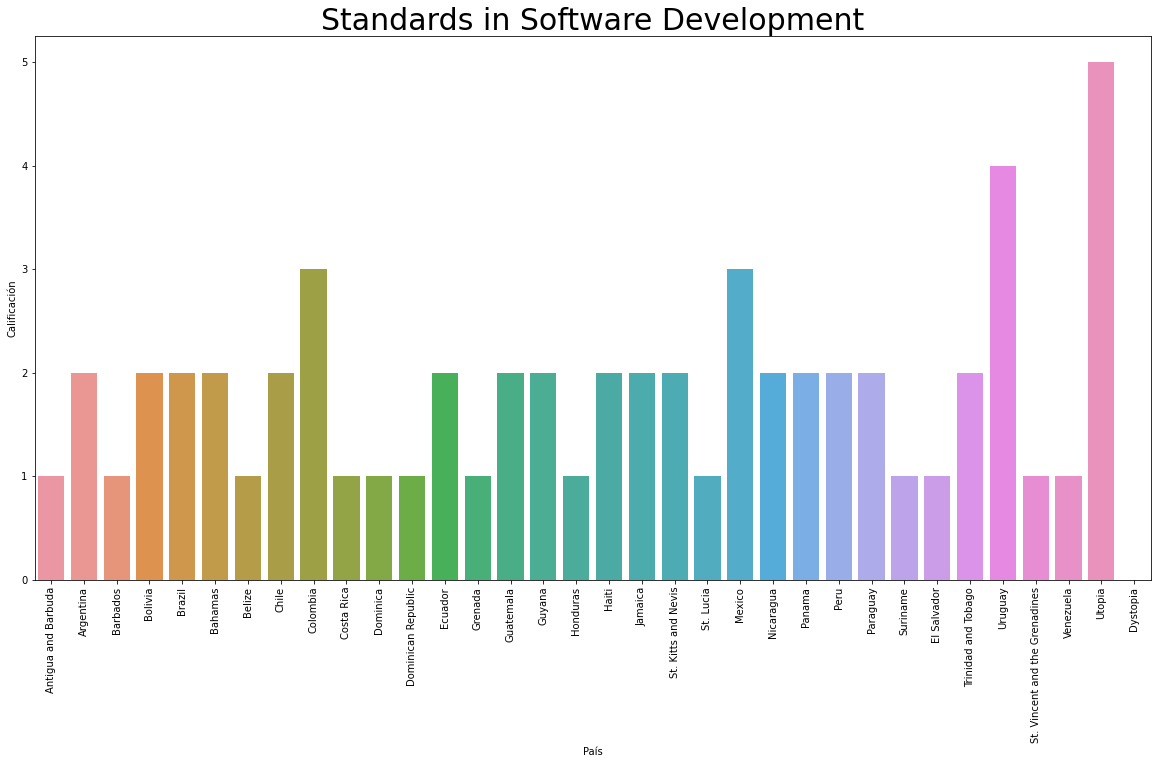

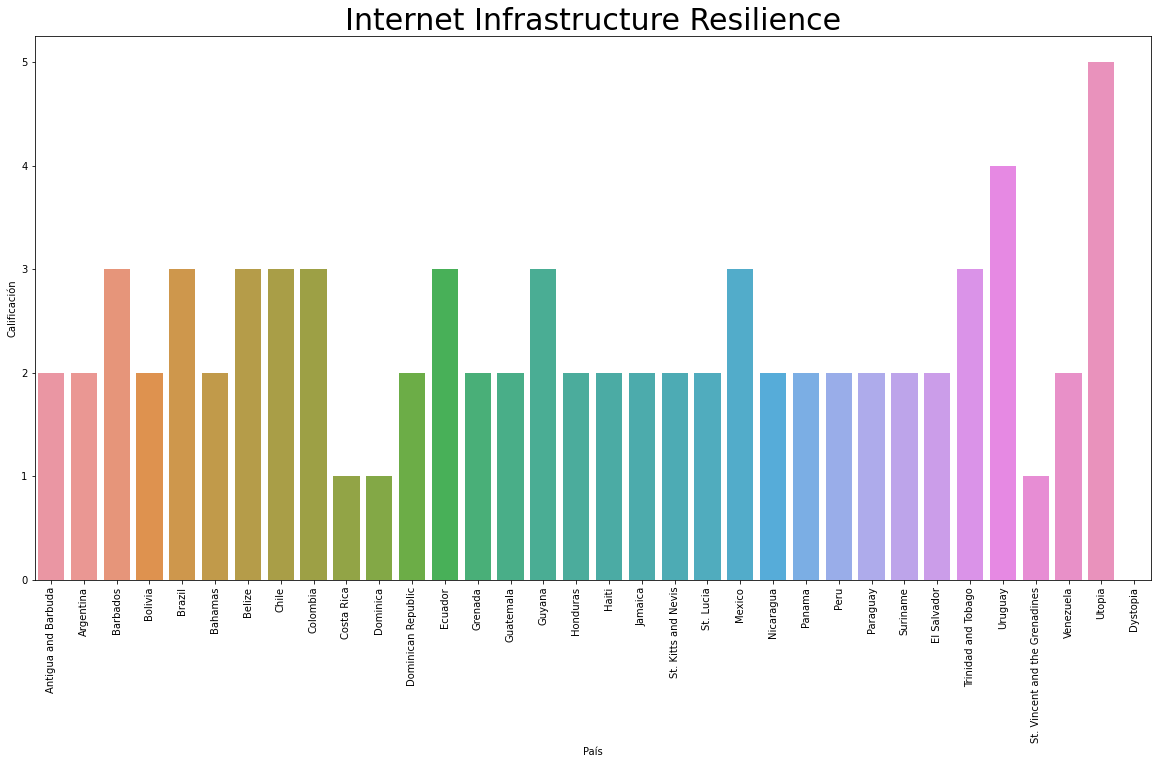

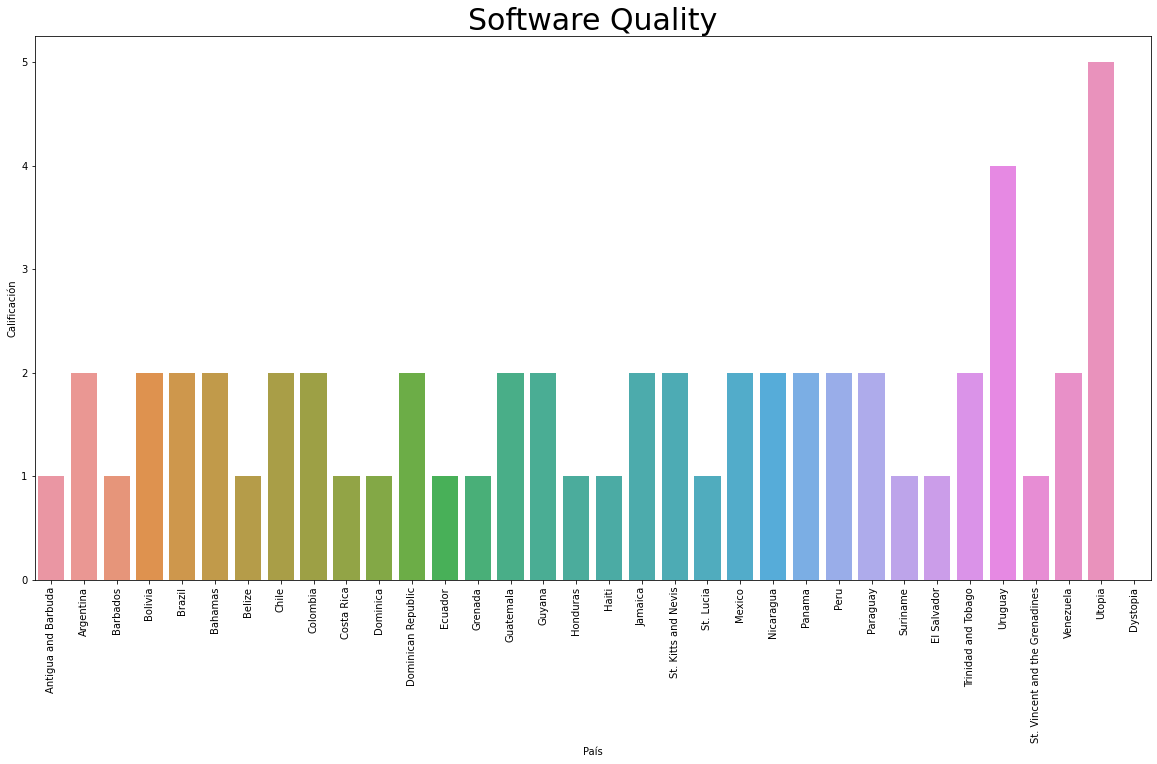

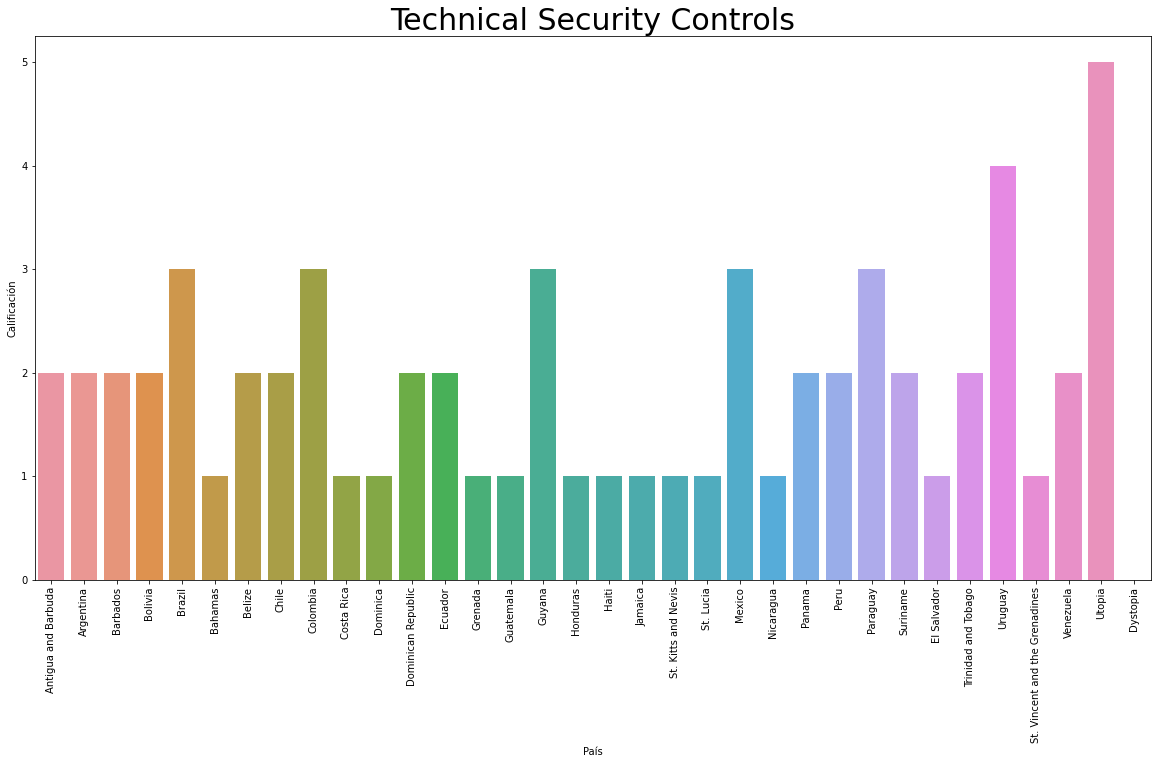

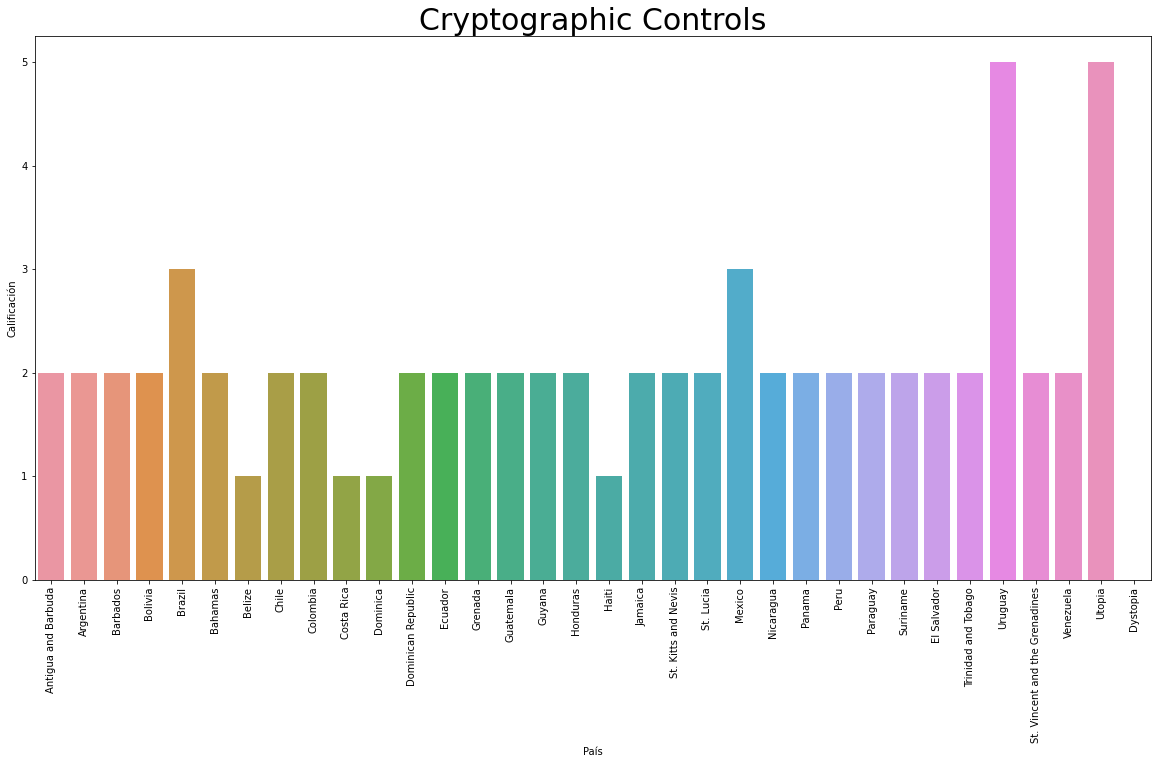

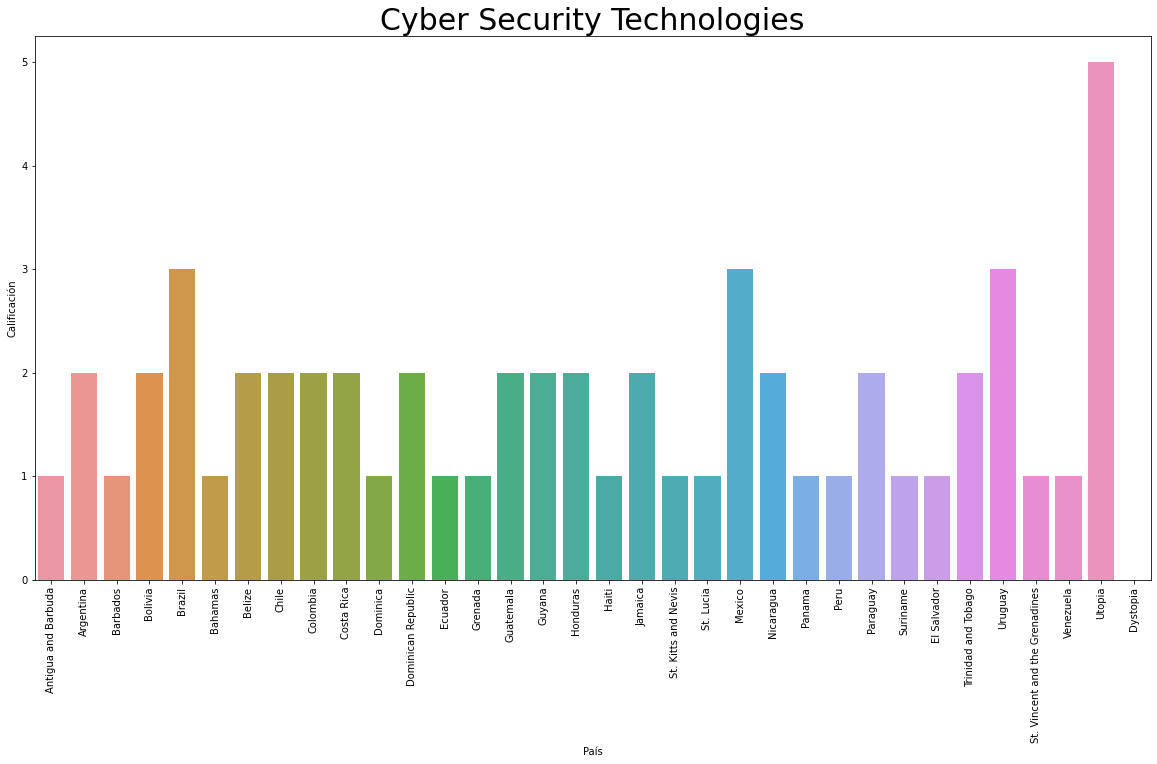

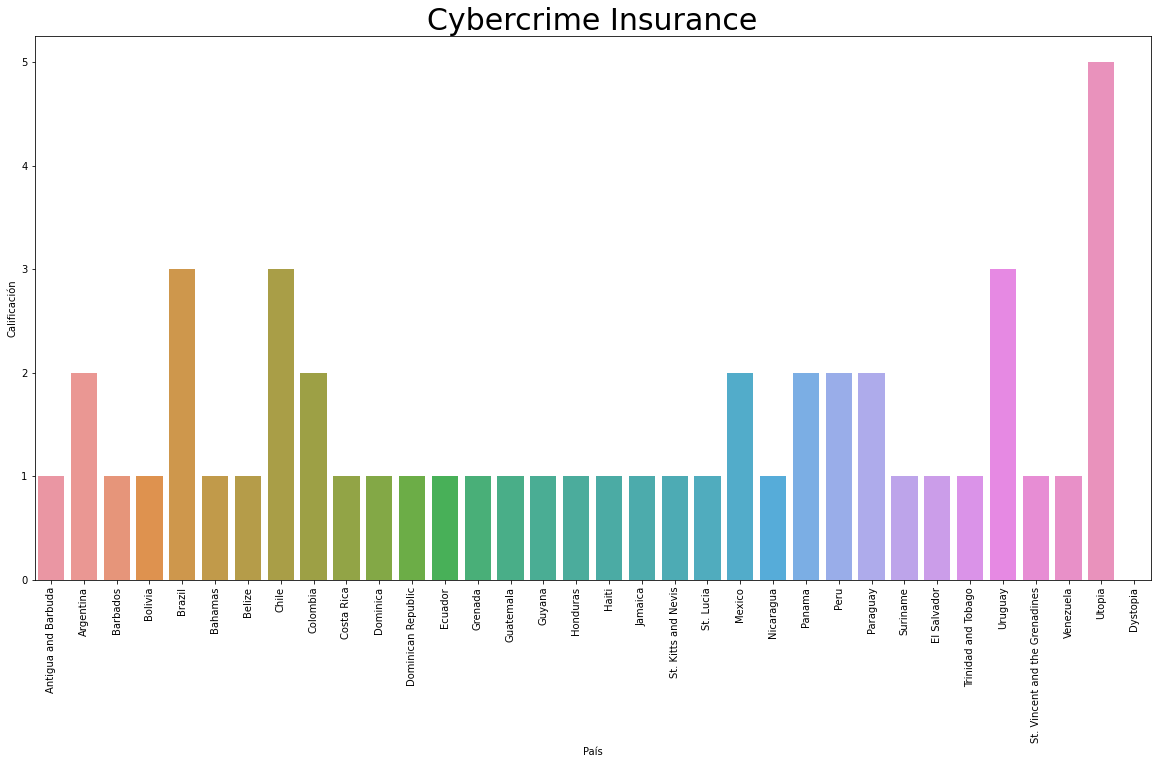

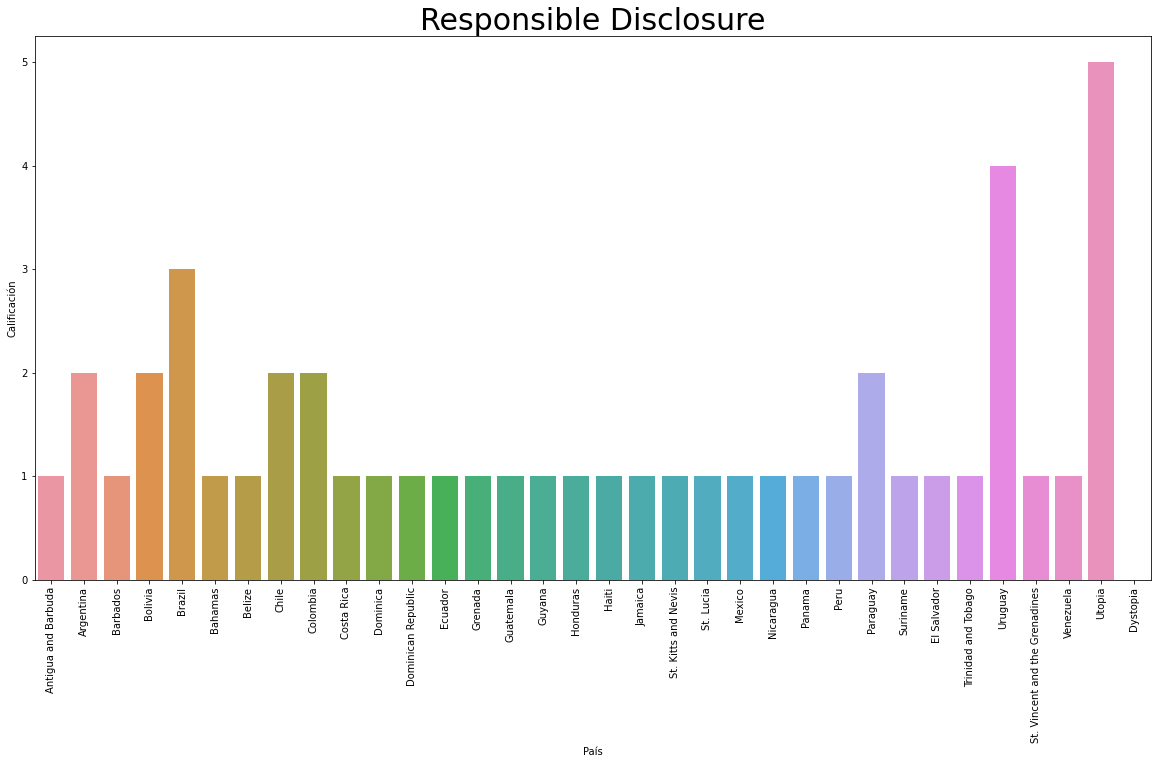

In [33]:
for i in dat2.drop(['Name'],axis =1).columns:
    plt.figure(figsize=(20,10))
    sns.barplot(x = dat2['Name']  ,y = dat2[i])
    plt.title(i,color='black',fontsize=30)
    plt.xlabel('País')
    plt.ylabel('Calificación')
    plt.xticks(rotation=90)
    plt.show()

# 

Prooceso de generar calificacion de cada País por PCA

In [34]:
pca = PCA(n_components=10)
dat4 = dat2.drop('Name', axis=1)
dat4 = pd.DataFrame(StandardScaler(with_std=False).fit_transform(dat4))
pca_fit = pca.fit_transform(dat4)
loads = pd.DataFrame(pca.components_.T)

In [36]:
variance_CP = pca.explained_variance_
loads.index = dat2.drop('Name', axis=1).columns
Components = pd.DataFrame(pca_fit)

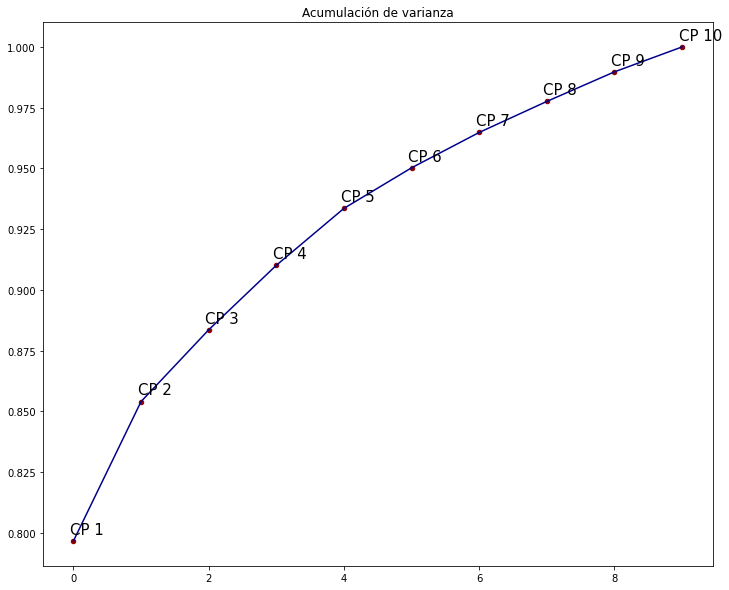

In [39]:
cp = np.array(('CP 1','CP 2','CP 3','CP 4','CP 5','CP 6','CP 7','CP 8','CP 9','CP 10'))

plt.figure(figsize=(12,10))
plt.plot(variance_CP.cumsum()/variance_CP.sum(),color='darkblue')
plt.scatter(range(0,10),variance_CP.cumsum()/variance_CP.sum(),color='darkred',s=20)
for i in range(10):
     plt.text(i-.05, (variance_CP.cumsum()/variance_CP.sum())[i] + 0.003, cp[i], fontsize=15)
plt.title('Acumulación de varianza')
plt.show()



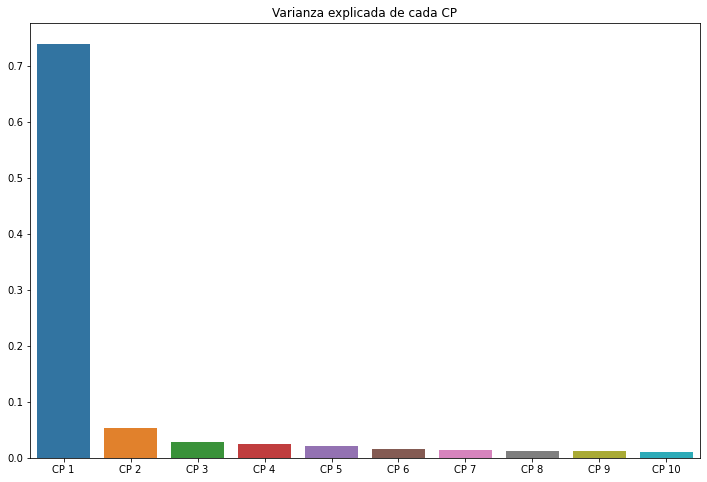

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x=cp,y=pca.explained_variance_ratio_)
plt.title('Varianza explicada de cada CP')
plt.show()


In [107]:
distancias = (np.sqrt(((pca_fit - pca_fit[-2] )**2).sum(axis = 1)))
distancias = pd.DataFrame(10  -( distancias / distancias.max())*10)
distancias.columns = ['Calificacion']
distancias.index = dat2.Name
distancias2 = distancias.copy()
distancias.sort_values(by = 'Calificacion' , ascending=False,inplace = True)
distancias

,Calificacion
Name,
Utopia,10.000000
Uruguay,6.515058
Colombia,5.666419
Brazil,5.604086
Mexico,5.382304
Chile,5.360763
Trinidad and Tobago,4.677557
Argentina,4.606690
Paraguay,4.355322


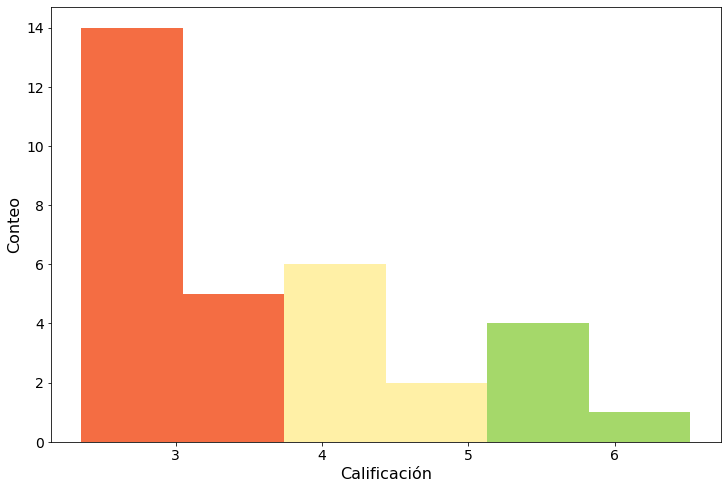

In [82]:
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(distancias.drop(["Utopia","Dystopia"],axis=0),6)
cmap = plt.get_cmap('RdYlGn')
low = cmap(0.2)
medium =cmap(0.45)
high = cmap(0.7)
for i in range(0,2):
    patches[i].set_facecolor(low)
for i in range(2,4):
    patches[i].set_facecolor(medium)
for i in range(4,6):
    patches[i].set_facecolor(high)

plt.xlabel("Calificación", fontsize=16)  
plt.ylabel("Conteo", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.show()

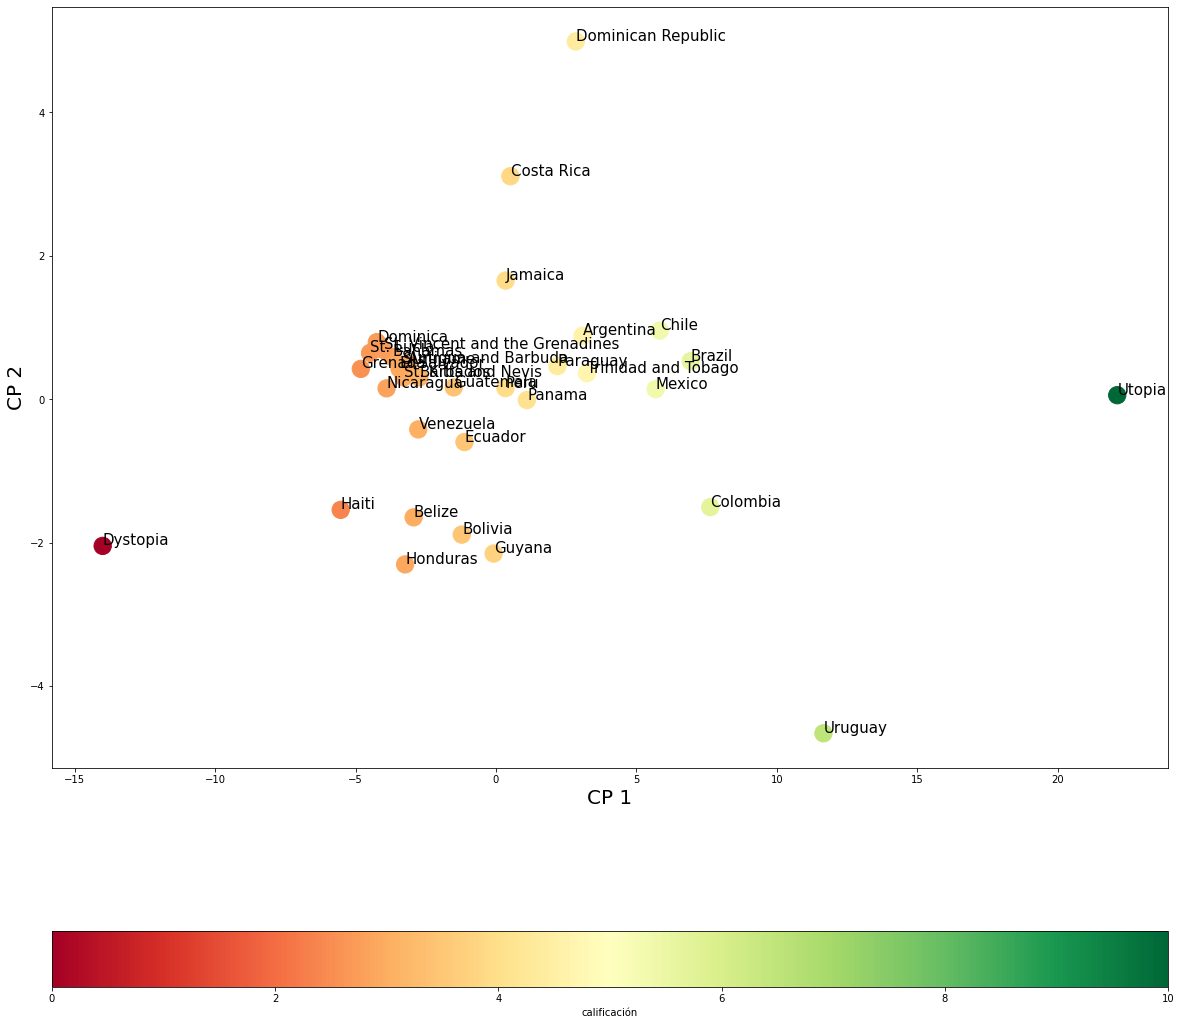

In [111]:
plt.figure(figsize=(20,20))
plt.scatter(Components[0],Components[1], c=np.array(distancias2) , cmap='RdYlGn', s=300)
plt.colorbar(label='calificación',orientation="horizontal")
for i in range(len(Components)):
    plt.text(Components[0][i]+0.01, Components[1][i]+0.01, dat2['Name'][i], fontsize=15)
plt.xlabel("CP 1",fontsize=20)
plt.ylabel("CP 2",fontsize=20)
plt.show()

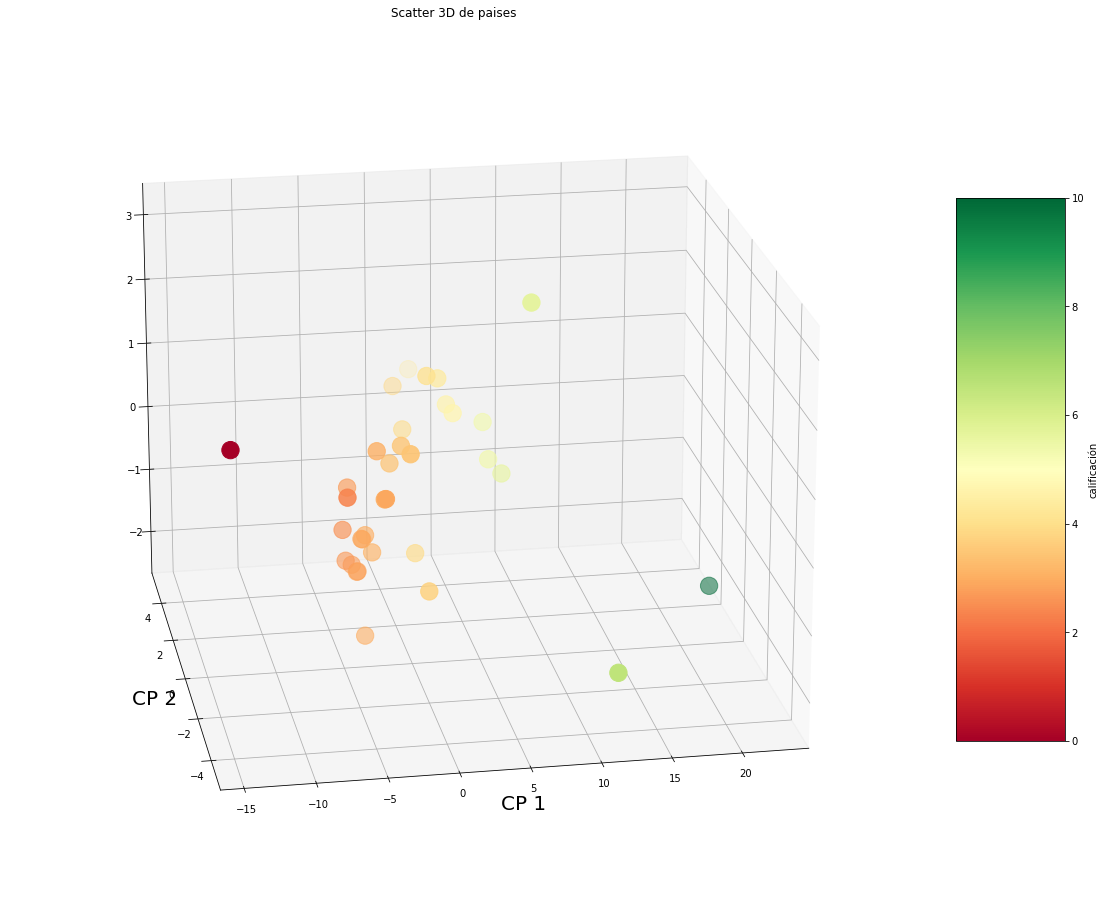

In [130]:
fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")
graf = ax.scatter3D(Components[0],Components[1], Components[2], c=np.array(distancias2) , cmap='RdYlGn', s=300)
fig.colorbar(graf,label='calificación',ax = ax,shrink = 0.5, aspect = 5)
ax.view_init(20,-100)
plt.title('Scatter 3D de paises')
plt.xlabel("CP 1",fontsize=20)
plt.ylabel("CP 2",fontsize=20)
plt.show()

# 

 K-Menas

In [131]:
Components.index = dat2['Name']
Components2 = Components.drop(["Utopia","Dystopia"],axis=0)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


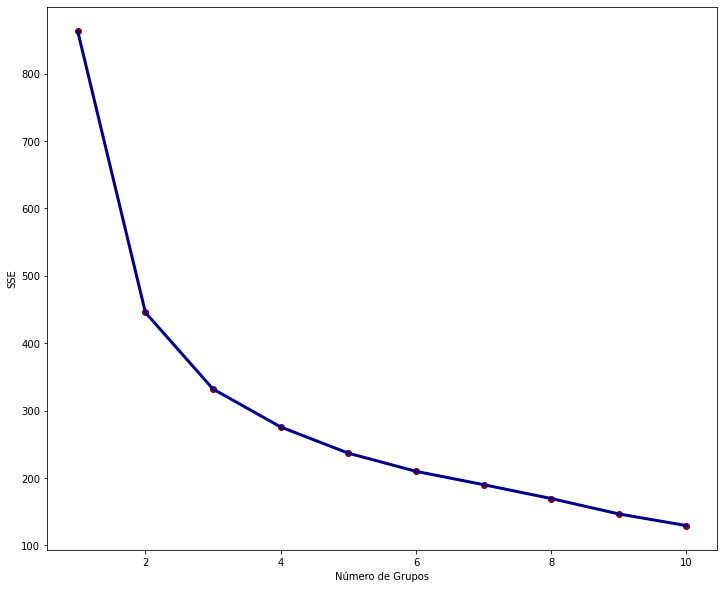

In [136]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=111)
    kmeans.fit(Components2)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,10))
plt.plot(range(1, 11), sse, linewidth=3,color='darkblue')
plt.scatter(range(1, 11), sse,color='darkred')
plt.xlabel("Número de Grupos")
plt.ylabel("SSE")
plt.show()


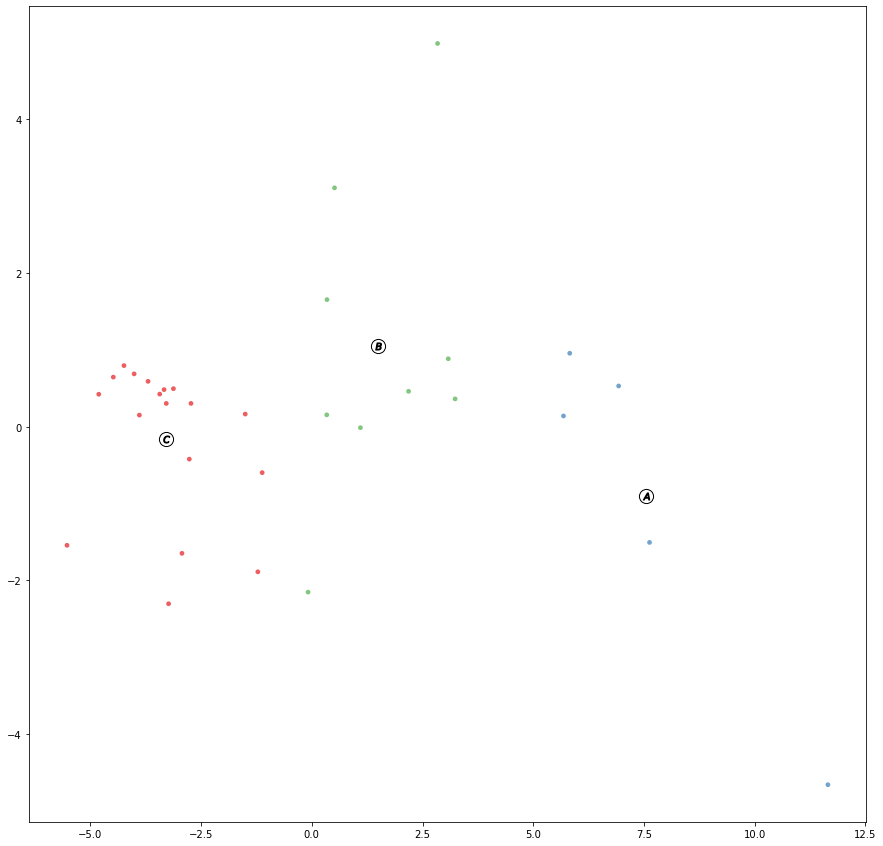

In [143]:
plt.figure(figsize=(15,15))
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

kmeans = KMeans(n_clusters=kl.elbow, random_state=111)
kmeans = kmeans.fit(Components2)

kmeans.inertia_
centers = kmeans.cluster_centers_
colors = cm.Set1(kmeans.labels_)
plt.scatter(Components2[0], Components2[1], marker=".", s=90, lw=0, alpha=0.7, c=colors, edgecolor="k")
plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

mark = np.array(('C','A','B'))

for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker=r"$ {} $".format(mark[i]), alpha=1, s=50, edgecolor="k")

paises = dat2['Name']
paises = paises[~paises.isin(("Utopia","Dystopia"))]
#=paises.tolist()

cluster = np.array((paises,kmeans.labels_)).T

pa = pd.DataFrame((paises.T,kmeans.labels_.T)).T
pa.columns =('Paises','Grupo')

grupoA = pa[pa['Grupo']==1]
grupoB = pa[pa['Grupo']==2]
grupoC = pa[pa['Grupo']==0]



 Clustering Jerárquico

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315]),
 [Text(5, 0, 'Antigua and Barbuda'),
  Text(15, 0, 'Barbados'),
  Text(25, 0, 'Suriname'),
  Text(35, 0, 'Dominica'),
  Text(45, 0, 'Nicaragua'),
  Text(55, 0, 'St. Kitts and Nevis'),
  Text(65, 0, 'St. Vincent and the Grenadines'),
  Text(75, 0, 'Grenada'),
  Text(85, 0, 'St. Lucia'),
  Text(95, 0, 'Bahamas'),
  Text(105, 0, 'El Salvador'),
  Text(115, 0, 'Haiti'),
  Text(125, 0, 'Belize'),
  Text(135, 0, 'Honduras'),
  Text(145, 0, 'Guyana'),
  Text(155, 0, 'Venezuela'),
  Text(165, 0, 'Bolivia'),
  Text(175, 0, 'Ecuador'),
  Text(185, 0, 'Dominican Republic'),
  Text(195, 0, 'Paraguay'),
  Text(205, 0, 'Argentina'),
  Text(215, 0, 'Trinidad and Tobago'),
  Text(225, 0, 'Costa Rica'),
  Text(235, 0, 'Guatemala'),
  Text(245, 0, 'Jamaica'),
  Text(255, 0, 'Panama'),
  Text(265, 0, 'Peru'),
  Text(275, 

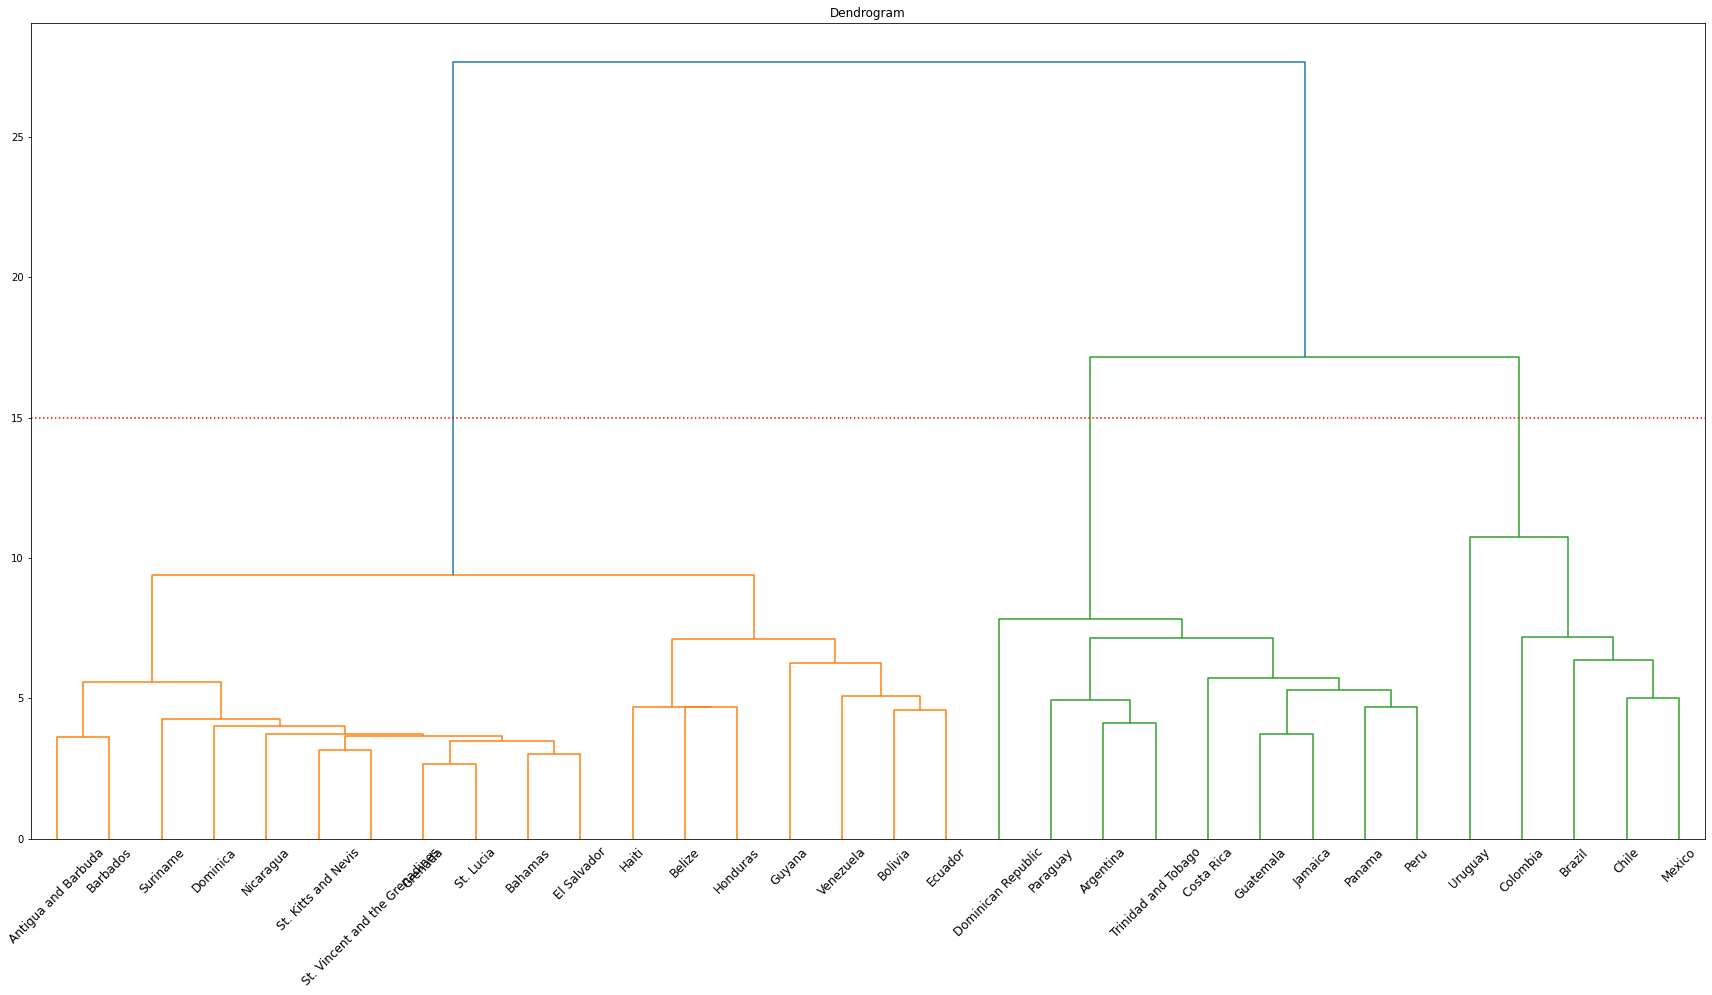

In [144]:
dat = pd.read_csv("CYBER.csv")
pais = dat['Name']
pais = pais[~pais.isin(("Utopia","Dystopia"))]
pais=pais.tolist()
dat = dat.drop(['Year','Name'], axis=1)
dat = dat[:-2]


plt.figure(figsize=(30,15))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(dat,method = 'ward' ),labels=pais)
plt.hlines(15, 0, 1000, linestyles ="dotted", colors ="red")
plt.xticks(fontsize=12)

In [145]:
grupoA

,Paises,Grupo
4,Brazil,1
7,Chile,1
8,Colombia,1
21,Mexico,1
29,Uruguay,1


In [146]:
grupoB

,Paises,Grupo
1,Argentina,2
9,Costa Rica,2
11,Dominican Republic,2
15,Guyana,2
18,Jamaica,2
23,Panama,2
24,Peru,2
25,Paraguay,2
28,Trinidad and Tobago,2


In [147]:
grupoC

,Paises,Grupo
0,Antigua and Barbuda,0
2,Barbados,0
3,Bolivia,0
5,Bahamas,0
6,Belize,0
10,Dominica,0
12,Ecuador,0
13,Grenada,0
14,Guatemala,0
16,Honduras,0
